# Business case

#### In the recent past, the industry of wealth management has seen a lot of growth. Every individual or business actively searches for opportunities to get the maximum returns. However, in most of the cases, they either lack the skills to identify the right investment opportunity, or there is a shortage of time for finding these opportunities. Hence, this gave rise to the dedicated individuals who perform this task on behalf of the investors for a commission - Portfolio managers.

#### A portfolio manager makes investment decisions and carries out other related activities on behalf of vested investors. They work with a team of analysts and researchers, and their main objective is to realise the needs of the investor and suggest a suitable portfolio that meets all the expectations. They are responsible for establishing the best investment strategy, selecting appropriate investments along with the right allocation. However, in doing so, they face a lot of competition in the form of other portfolio managers and rival firms. Therefore, the portfolio manager has to use the available resources to provide the best solution to the investor.

## Problem Statement

##### Ms Alexandra Kolishnyick (aka Alexa) , daughter of a famous Ukrainian business tycoon, Intends to form an NGO along with her batchmates to support sub-Saharan African region. She has a huge savings from the money sent by parents for daily expense till date. She wants to invest the saved money in stocks which shows good returns and are also stable (Low risk).

##### Ms. Alexa wants a comprehensive report on all the metrics used to devise the investment strategy. 

We have gathered data for last 10 years for the stocks from following industries:
 - Technology/IT
 - Travel/Aviation/Hospitality
 - Banking/Financial Services and Insurance
 - Pharmaceuticals/Healthcare/Life Sciences

Lets start working on the data and try to get insights from the data. We shall begin with importing the libraries and Data.

In [1]:
# Import Libraries

import warnings

warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 500)
import math
from scipy import stats

### Import Data

In [2]:
df1= pd.read_csv('AAL.csv')

In [3]:
df2=pd.read_csv('AAPL.csv')
df3= pd.read_csv('ALK.csv')
df4= pd.read_csv('AMZN.csv')
df5= pd.read_csv('BHC.csv')
df6= pd.read_csv('CS.csv')
df7 = pd.read_csv('DB.csv')
df8= pd.read_csv('GOOG.csv')
df9= pd.read_csv('GS.csv')
df10=pd.read_csv('HA.csv')
df11= pd.read_csv('JNJ.csv')
df12=pd.read_csv('MRK.csv')
df13=pd.read_csv('S&P500.csv')

In [4]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-10-2010,9.29,9.39,9.21,9.29,8.758067,3603800
1,04-10-2010,9.24,9.48,9.05,9.12,8.597802,3856800
2,05-10-2010,9.27,9.35,9.15,9.23,8.701504,3896600
3,06-10-2010,9.27,9.40,9.15,9.23,8.701504,3230200
4,07-10-2010,9.30,9.31,9.07,9.24,8.710930,3877700


In [5]:
# adding suffix to the column names to make it more readable

df1.columns=df1.columns.map(lambda x : x + '_AAL' if x !='Date'else x)
df2.columns=df2.columns.map(lambda x : x + '_AAPL' if x !='Date'else x)
df3.columns=df3.columns.map(lambda x : x + '_ALK' if x !='Date'else x)
df4.columns=df4.columns.map(lambda x : x + '_AMZN' if x !='Date'else x)
df5.columns=df5.columns.map(lambda x : x + '_BHC' if x !='Date'else x)
df6.columns=df6.columns.map(lambda x : x + '_CS' if x !='Date'else x)
df7.columns=df7.columns.map(lambda x : x + '_DB' if x !='Date'else x)
df8.columns=df8.columns.map(lambda x : x + '_GOOG' if x !='Date'else x)
df9.columns=df9.columns.map(lambda x : x + '_GS' if x !='Date'else x)
df10.columns=df10.columns.map(lambda x : x + '_HA' if x !='Date'else x)
df11.columns=df11.columns.map(lambda x : x + '_JNJ' if x !='Date'else x)
df12.columns=df12.columns.map(lambda x : x + '_MRK' if x !='Date'else x)
df13.columns=df13.columns.map(lambda x : x + '_S&P500' if x !='Date'else x)

In [6]:
df1.isnull().sum()

Date             0
Open_AAL         0
High_AAL         0
Low_AAL          0
Close_AAL        0
Adj Close_AAL    0
Volume_AAL       0
dtype: int64

In [7]:
df2.isnull().sum()

Date              0
Open_AAPL         0
High_AAPL         0
Low_AAPL          0
Close_AAPL        0
Adj Close_AAPL    0
Volume_AAPL       0
dtype: int64

In [8]:
df3.isnull().sum()

Date             7
Open_ALK         7
High_ALK         7
Low_ALK          7
Close_ALK        7
Adj Close_ALK    7
Volume_ALK       7
dtype: int64

In [9]:
portfolio=df1.merge(df2,on='Date', how='inner').merge(df3,on='Date', how='inner').merge(df4,on='Date', how='inner').merge(df5,on='Date', how='inner').merge(df6,on='Date', how='inner').merge(df7,on='Date', how='inner').merge(df8,on='Date', how='inner').merge(df9,on='Date', how='inner').merge(df10,on='Date', how='inner').merge(df11,on='Date', how='inner').merge(df12,on='Date', how='inner').merge(df13,on='Date', how='inner')

In [10]:
portfolio.head()

,Date,Open_AAL,High_AAL,Low_AAL,Close_AAL,Adj Close_AAL,Volume_AAL,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL,Open_ALK,High_ALK,Low_ALK,Close_ALK,Adj Close_ALK,Volume_ALK,Open_AMZN,High_AMZN,Low_AMZN,Close_AMZN,Adj Close_AMZN,Volume_AMZN,Open_BHC,High_BHC,Low_BHC,Close_BHC,Adj Close_BHC,Volume_BHC,Open_CS,High_CS,Low_CS,Close_CS,Adj Close_CS,Volume_CS,Open_DB,High_DB,Low_DB,Close_DB,Adj Close_DB,Volume_DB,Open_GOOG,High_GOOG,Low_GOOG,Close_GOOG,Adj Close_GOOG,Volume_GOOG,Open_GS,High_GS,Low_GS,Close_GS,Adj Close_GS,Volume_GS,Open_HA,High_HA,Low_HA,Close_HA,Adj Close_HA,Volume_HA,Open_JNJ,High_JNJ,Low_JNJ,Close_JNJ,Adj Close_JNJ,Volume_JNJ,Open_MRK,High_MRK,Low_MRK,Close_MRK,Adj Close_MRK,Volume_MRK,Open_S&P500,High_S&P500,Low_S&P500,Close_S&P500,Adj Close_S&P500,Volume_S&P500
0,01-10-2010,9.29,9.39,9.21,9.29,8.758067,3603800,10.219643,10.235000,10.048214,10.090000,8.719163,448142800,12.9325,12.9625,12.3675,12.4475,10.972344,1663600.0,157.080002,157.440002,152.199997,153.710007,153.710007,8683400.0,25.120001,25.879999,25.100000,25.750000,24.757708,5778700.0,41.835938,42.285156,41.562500,42.226563,30.167257,1814900.0,52.585876,52.862595,52.003819,52.595421,44.981487,2010600.0,264.010437,264.319275,260.523499,261.828613,261.828613,4466600.0,145.199997,148.500000,144.820007,147.699997,127.147858,7439800.0,6.02,6.05,5.88,5.96,5.742526,645400.0,62.090000,62.250000,61.570000,61.750000,45.970119,9773200.0,36.759998,36.840000,36.349998,36.599998,26.052284,11741900.0,1143.489990,1150.300049,1139.420044,1146.239990,1146.239990,4298910000
1,04-10-2010,9.24,9.48,9.05,9.12,8.597802,3856800,10.057143,10.103572,9.920357,9.951428,8.599421,435302000,12.4300,12.5900,11.9975,12.1425,10.703489,1512400.0,153.949997,155.960007,152.789993,155.389999,155.389999,5346500.0,25.750000,25.990000,25.590000,25.870001,24.873083,4187200.0,42.265625,42.431641,41.582031,41.914063,29.943998,1085600.0,52.204197,52.604961,51.412212,51.755726,44.263348,1245600.0,261.494843,263.138702,258.456238,260.199707,260.199707,3895400.0,147.699997,148.470001,144.699997,146.570007,126.175117,5866700.0,5.96,6.00,5.73,5.75,5.540189,618900.0,61.540001,61.980000,61.299999,61.669998,45.910553,8703600.0,36.490002,36.750000,36.290001,36.520000,25.995331,9234900.0,1144.959961,1148.160034,1131.869995,1137.030029,1137.030029,3604110000
2,05-10-2010,9.27,9.35,9.15,9.23,8.701504,3896600,10.071428,10.337500,10.065000,10.319285,8.917298,501967200,12.2600,12.2850,11.9450,12.2150,10.767396,2567200.0,157.080002,161.210007,157.009995,160.869995,160.869995,5620000.0,26.040001,26.330000,25.830000,26.299999,25.286512,4610300.0,42.607422,43.427734,42.509766,43.154297,30.830046,1025300.0,52.891220,54.427483,52.795803,53.950382,46.140301,2270900.0,263.203461,268.991760,262.291870,268.110046,268.110046,7040400.0,147.559998,150.279999,146.070007,149.570007,128.757706,8724700.0,5.82,5.93,5.77,5.85,5.636539,534800.0,62.080002,62.939999,62.009998,62.799999,46.751797,12439400.0,36.860001,37.150002,36.700001,37.020000,26.351234,10669200.0,1140.680054,1162.760010,1140.680054,1160.750000,1160.750000,4068840000
3,06-10-2010,9.27,9.40,9.15,9.23,8.701504,3230200,10.342500,10.428214,10.187857,10.328215,8.925013,670868800,12.2200,12.3950,12.0875,12.1875,10.743157,1043600.0,160.600006,160.679993,154.600006,155.399994,155.399994,6060800.0,26.150000,26.879999,26.049999,26.690001,25.661484,4448900.0,43.496094,43.701172,43.330078,43.437500,31.032362,871300.0,54.723282,54.971375,54.398853,54.608780,46.703384,1887400.0,268.623138,268.966858,263.980530,266.177307,266.177307,5545200.0,149.750000,152.330002,149.130005,150.839996,129.850906,6330600.0,5.85,6.05,5.85,5.97,5.752162,2563900.0,62.889999,63.259998,62.500000,63.209999,47.057022,11339800.0,37.040001,37.220001,36.820000,37.009998,26.344130,7541300.0,1159.810059,1162.329956,1154.849976,1159.969971,1159.969971,4073160000
4,07-10-2010,9.30,9.31,9.07,9.24,8.710930,3877700,10.369286,10.374286,10.246786,10.329286,8.925941,408399600,12.2775,12.3450,11

In [11]:
portfolio.shape

(2517, 79)

In [12]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2516
Data columns (total 79 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2517 non-null   object 
 1   Open_AAL          2517 non-null   float64
 2   High_AAL          2517 non-null   float64
 3   Low_AAL           2517 non-null   float64
 4   Close_AAL         2517 non-null   float64
 5   Adj Close_AAL     2517 non-null   float64
 6   Volume_AAL        2517 non-null   int64  
 7   Open_AAPL         2517 non-null   float64
 8   High_AAPL         2517 non-null   float64
 9   Low_AAPL          2517 non-null   float64
 10  Close_AAPL        2517 non-null   float64
 11  Adj Close_AAPL    2517 non-null   float64
 12  Volume_AAPL       2517 non-null   int64  
 13  Open_ALK          2517 non-null   float64
 14  High_ALK          2517 non-null   float64
 15  Low_ALK           2517 non-null   float64
 16  Close_ALK         2517 non-null   float64


In [13]:
portfolio.isnull().sum()

Date                0
Open_AAL            0
High_AAL            0
Low_AAL             0
Close_AAL           0
Adj Close_AAL       0
Volume_AAL          0
Open_AAPL           0
High_AAPL           0
Low_AAPL            0
Close_AAPL          0
Adj Close_AAPL      0
Volume_AAPL         0
Open_ALK            0
High_ALK            0
Low_ALK             0
Close_ALK           0
Adj Close_ALK       0
Volume_ALK          0
Open_AMZN           0
High_AMZN           0
Low_AMZN            0
Close_AMZN          0
Adj Close_AMZN      0
Volume_AMZN         0
Open_BHC            0
High_BHC            0
Low_BHC             0
Close_BHC           0
Adj Close_BHC       0
Volume_BHC          0
Open_CS             0
High_CS             0
Low_CS              0
Close_CS            0
Adj Close_CS        0
Volume_CS           0
Open_DB             0
High_DB             0
Low_DB              0
Close_DB            0
Adj Close_DB        0
Volume_DB           0
Open_GOOG           0
High_GOOG           0
Low_GOOG  

In [14]:
# getting close price for all the stocks

col_price= portfolio.columns[portfolio.columns.str.contains('Close')]
col_price

Index(['Close_AAL', 'Adj Close_AAL', 'Close_AAPL', 'Adj Close_AAPL', 'Close_ALK', 'Adj Close_ALK', 'Close_AMZN', 'Adj Close_AMZN', 'Close_BHC', 'Adj Close_BHC', 'Close_CS', 'Adj Close_CS', 'Close_DB', 'Adj Close_DB', 'Close_GOOG', 'Adj Close_GOOG', 'Close_GS', 'Adj Close_GS', 'Close_HA', 'Adj Close_HA', 'Close_JNJ', 'Adj Close_JNJ', 'Close_MRK', 'Adj Close_MRK', 'Close_S&P500', 'Adj Close_S&P500'], dtype='object')

In [15]:
# creating new dataframe with price

price_df= portfolio[['Date','Close_AAL','Close_AAPL','Close_ALK','Close_AMZN','Close_BHC','Close_CS','Close_DB','Close_GOOG','Close_GS','Close_HA','Close_JNJ','Close_MRK','Close_S&P500']]

In [16]:
price_df.round(2).head()

,Date,Close_AAL,Close_AAPL,Close_ALK,Close_AMZN,Close_BHC,Close_CS,Close_DB,Close_GOOG,Close_GS,Close_HA,Close_JNJ,Close_MRK,Close_S&P500
0,01-10-2010,9.29,10.09,12.45,153.71,25.75,42.23,52.60,261.83,147.70,5.96,61.75,36.60,1146.24
1,04-10-2010,9.12,9.95,12.14,155.39,25.87,41.91,51.76,260.20,146.57,5.75,61.67,36.52,1137.03
2,05-10-2010,9.23,10.32,12.22,160.87,26.30,43.15,53.95,268.11,149.57,5.85,62.80,37.02,1160.75
3,06-10-2010,9.23,10.33,12.19,155.40,26.69,43.44,54.61,266.18,150.84,5.97,63.21,37.01,1159.97
4,07-10-2010,9.24,10.33,11.62,156.27,26.60,43.67,54.04,264.02,151.11,6.15,63.22,36.71,1158.06


In [17]:
# getting volumes for all the stocks

col_volumes =  portfolio.columns[portfolio.columns.str.contains('Volume')]
col_volumes 

Index(['Volume_AAL', 'Volume_AAPL', 'Volume_ALK', 'Volume_AMZN', 'Volume_BHC', 'Volume_CS', 'Volume_DB', 'Volume_GOOG', 'Volume_GS', 'Volume_HA', 'Volume_JNJ', 'Volume_MRK', 'Volume_S&P500'], dtype='object')

In [18]:
# creating new dataframe with volumes

volume_df=portfolio[['Date','Volume_AAL', 'Volume_AAPL', 'Volume_ALK', 'Volume_AMZN', 'Volume_BHC', 'Volume_CS', 'Volume_DB', 'Volume_GOOG', 'Volume_GS', 'Volume_HA', 'Volume_JNJ', 'Volume_MRK', 'Volume_S&P500']]

In [19]:
volume_df.head()

,Date,Volume_AAL,Volume_AAPL,Volume_ALK,Volume_AMZN,Volume_BHC,Volume_CS,Volume_DB,Volume_GOOG,Volume_GS,Volume_HA,Volume_JNJ,Volume_MRK,Volume_S&P500
0,01-10-2010,3603800,448142800,1663600.0,8683400.0,5778700.0,1814900.0,2010600.0,4466600.0,7439800.0,645400.0,9773200.0,11741900.0,4298910000
1,04-10-2010,3856800,435302000,1512400.0,5346500.0,4187200.0,1085600.0,1245600.0,3895400.0,5866700.0,618900.0,8703600.0,9234900.0,3604110000
2,05-10-2010,3896600,501967200,2567200.0,5620000.0,4610300.0,1025300.0,2270900.0,7040400.0,8724700.0,534800.0,12439400.0,10669200.0,4068840000
3,06-10-2010,3230200,670868800,1043600.0,6060800.0,4448900.0,871300.0,1887400.0,5545200.0,6330600.0,2563900.0,11339800.0,7541300.0,4073160000
4,07-10-2010,3877700,408399600,7682400.0,4622000.0,2453900.0,1377000.0,1191000.0,4809400.0,4471500.0,1115200.0,9826600.0,13897800.0,3910550000


In [20]:
# set date as index for both volume_df and price_df

price_df=price_df.set_index('Date')
volume_df= volume_df.set_index('Date')

In [21]:
price_df.head()

,Close_AAL,Close_AAPL,Close_ALK,Close_AMZN,Close_BHC,Close_CS,Close_DB,Close_GOOG,Close_GS,Close_HA,Close_JNJ,Close_MRK,Close_S&P500
Date,,,,,,,,,,,,,
01-10-2010,9.29,10.090000,12.4475,153.710007,25.750000,42.226563,52.595421,261.828613,147.699997,5.96,61.750000,36.599998,1146.239990
04-10-2010,9.12,9.951428,12.1425,155.389999,25.870001,41.914063,51.755726,260.199707,146.570007,5.75,61.669998,36.520000,1137.030029
05-10-2010,9.23,10.319285,12.2150,160.869995,26.299999,43.154297,53.950382,268.110046,149.570007,5.85,62.799999,37.020000,1160.750000
06-10-2010,9.23,10.328215,12.1875,155.399994,26.690001,43.437500,54.608780,266.177307,150.839996,5.97,63.209999,37.009998,1159.969971
07-10-2010,9.24,10.329286,11.6250,156.270004,26.600000,43.671875,54.036259,264.015411,151.110001,6.15,63.220001,36.709999,1158.060059


In [22]:
volume_df.head()

,Volume_AAL,Volume_AAPL,Volume_ALK,Volume_AMZN,Volume_BHC,Volume_CS,Volume_DB,Volume_GOOG,Volume_GS,Volume_HA,Volume_JNJ,Volume_MRK,Volume_S&P500
Date,,,,,,,,,,,,,
01-10-2010,3603800,448142800,1663600.0,8683400.0,5778700.0,1814900.0,2010600.0,4466600.0,7439800.0,645400.0,9773200.0,11741900.0,4298910000
04-10-2010,3856800,435302000,1512400.0,5346500.0,4187200.0,1085600.0,1245600.0,3895400.0,5866700.0,618900.0,8703600.0,9234900.0,3604110000
05-10-2010,3896600,501967200,2567200.0,5620000.0,4610300.0,1025300.0,2270900.0,7040400.0,8724700.0,534800.0,12439400.0,10669200.0,4068840000
06-10-2010,3230200,670868800,1043600.0,6060800.0,4448900.0,871300.0,1887400.0,5545200.0,6330600.0,2563900.0,11339800.0,7541300.0,4073160000
07-10-2010,3877700,408399600,7682400.0,4622000.0,2453900.0,1377000.0,1191000.0,4809400.0,4471500.0,1115200.0,9826600.0,13897800.0,3910550000


In [23]:
# checking for missing values
price_df.isna().sum()

Close_AAL       0
Close_AAPL      0
Close_ALK       0
Close_AMZN      0
Close_BHC       0
Close_CS        0
Close_DB        0
Close_GOOG      0
Close_GS        0
Close_HA        0
Close_JNJ       0
Close_MRK       0
Close_S&P500    0
dtype: int64

In [24]:
# checking for missing values
price_df.isna().sum()

Close_AAL       0
Close_AAPL      0
Close_ALK       0
Close_AMZN      0
Close_BHC       0
Close_CS        0
Close_DB        0
Close_GOOG      0
Close_GS        0
Close_HA        0
Close_JNJ       0
Close_MRK       0
Close_S&P500    0
dtype: int64

In [25]:
price_df.shape

(2517, 13)

In [26]:
volume_df.shape

(2517, 13)

In [27]:
portfolio.describe()

,Open_AAL,High_AAL,Low_AAL,Close_AAL,Adj Close_AAL,Volume_AAL,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL,Open_ALK,High_ALK,Low_ALK,Close_ALK,Adj Close_ALK,Volume_ALK,Open_AMZN,High_AMZN,Low_AMZN,Close_AMZN,Adj Close_AMZN,Volume_AMZN,Open_BHC,High_BHC,Low_BHC,Close_BHC,Adj Close_BHC,Volume_BHC,Open_CS,High_CS,Low_CS,Close_CS,Adj Close_CS,Volume_CS,Open_DB,High_DB,Low_DB,Close_DB,Adj Close_DB,Volume_DB,Open_GOOG,High_GOOG,Low_GOOG,Close_GOOG,Adj Close_GOOG,Volume_GOOG,Open_GS,High_GS,Low_GS,Close_GS,Adj Close_GS,Volume_GS,Open_HA,High_HA,Low_HA,Close_HA,Adj Close_HA,Volume_HA,Open_JNJ,High_JNJ,Low_JNJ,Close_JNJ,Adj Close_JNJ,Volume_JNJ,Open_MRK,High_MRK,Low_MRK,Close_MRK,Adj Close_MRK,Volume_MRK,Open_S&P500,High_S&P500,Low_S&P500,Close_S&P500,Adj Close_S&P500,Volume_S&P500
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,29.419932,29.893743,28.932447,29.397636,28.332638,1.263146e+07,33.439071,33.779245,33.100709,33.454670,31.776725,2.635459e+08,50.047186,50.697005,49.362837,50.031176,46.889544,1.648085e+06,854.694502,863.694672,844.614346,854.636107,854.636107,4.326001e+06,61.921855,62.954450,60.800842,61.880687,61.869178,7.194057e+06,21.509947,21.669869,21.327741,21.501379,17.507931,2.476788e+06,27.316815,27.560722,27.031801,27.304930,25.029328,3.677383e+06,730.216929,736.835386,723.497451,730.426139,730.426139,2.951427e+06,179.600068,181.383846,177.825284,179.598184,166.665287,3.833079e+06,22.884056,23.287282,22.475161,22.870413,22.182312,9.365502e+05,105.259623,105.952817,104.535809,105.277378,93.859400,8.605432e+06,57.158049,57.622483,56.687044,57.161053,50.180250,1.193947e+07,2110.972959,2121.516622,2099.447811,2111.392732,2111.392732,3.739228e+09
std,15.211082,15.368377,15.046234,15.211889,14.712407,2.149322e+07,20.613154,20.904335,20.313069,20.630118,21.162673,2.037493e+08,24.189029,24.433428,23.940427,24.187020,23.293159,1.095121e+06,745.456591,754.210120,735.446543,745.201139,745.201139,2.410250e+06,57.184078,57.986347,56.241815,57.170002,57.177157,1.121985e+07,8.993599,9.044728,8.926825,8.988043,5.732890,1.847826e+06,15.417764,15.540430,15.262247,15.409974,13.191191,3.553901e+06,364.219780,368.353512,360.530374,364.685720,364.685720,2.460964e+06,42.472256,42.657155,42.206770,42.405475,43.999974,2.187223e+06,15.490954,15.723554,15.270538,15.483034,14.964163,6.485618e+05,28.188259,28.444802,27.912056,28.174233,31.834527,4.493037e+06,15.168068,15.316701,15.005664,15.164505,17.593225,6.218030e+06,612.451995,614.993509,609.248031,612.227235,612.227235,8.805742e+08
min,3.990000,4.060000,3.960000,4.000000,3.770966,1.158400e+06,10.057143,10.103572,9.920357,9.951428,8.599421,3.247000e+07,11.655000,11.882500,11.215000,11.620000,10.242908,2.706000e+05,152.509995,155.960007,151.399994,153.029999,153.029999,8.813000e+05,8.560000,8.780000,8.310000,8.510000,8.510000,3.803000e+05,6.550000,6.860000,6.470000,6.670000,6.552680,2.050000e+05,5.030000,5.680000,4.990000,5.480000,5.480000,0.000000e+00,236.114990,239.477386,235.626816,236.553345,236.553345,7.900000e+03,88.059998,89.279999,84.269997,87.699997,76.414085,4.677000

In [28]:
price_df.describe()

,Close_AAL,Close_AAPL,Close_ALK,Close_AMZN,Close_BHC,Close_CS,Close_DB,Close_GOOG,Close_GS,Close_HA,Close_JNJ,Close_MRK,Close_S&P500
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,29.397636,33.454670,50.031176,854.636107,61.880687,21.501379,27.304930,730.426139,179.598184,22.870413,105.277378,57.161053,2111.392732
std,15.211889,20.630118,24.187020,745.201139,57.170002,8.988043,15.409974,364.685720,42.405475,15.483034,28.174233,15.164505,612.227235
min,4.000000,9.951428,11.620000,153.029999,8.510000,6.670000,5.480000,236.553345,87.699997,3.780000,57.660000,29.809999,1099.229980
25%,13.010000,18.961428,26.780001,266.489990,22.170000,13.740000,13.470000,403.642059,154.990005,7.030000,81.930000,45.730000,1562.170044
50%,32.520000,27.592501,58.540001,533.750000,38.759998,19.639999,28.370001,651.789978,177.229996,21.910000,104.040001,57.180000,2071.219971
75%,42.200001,42.962502,67.260002,1500.000000,90.269997,27.750000,41.049618,1055.810059,211.580002,36.900002,130.979996,64.089996,2656.300049
max,58.470001,134.179993,100.239998,3531.449951,262.519989,46.513672,62.624046,1728.280029,273.380005,60.299999,155.509995,92.040001,3580.840088


In [29]:
volume_df.describe()

,Volume_AAL,Volume_AAPL,Volume_ALK,Volume_AMZN,Volume_BHC,Volume_CS,Volume_DB,Volume_GOOG,Volume_GS,Volume_HA,Volume_JNJ,Volume_MRK,Volume_S&P500
count,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03
mean,1.263146e+07,2.635459e+08,1.648085e+06,4.326001e+06,7.194057e+06,2.476788e+06,3.677383e+06,2.951427e+06,3.833079e+06,9.365502e+05,8.605432e+06,1.193947e+07,3.739228e+09
std,2.149322e+07,2.037493e+08,1.095121e+06,2.410250e+06,1.121985e+07,1.847826e+06,3.553901e+06,2.460964e+06,2.187223e+06,6.485618e+05,4.493037e+06,6.218030e+06,8.805742e+08
min,1.158400e+06,3.247000e+07,2.706000e+05,8.813000e+05,3.803000e+05,2.050000e+05,0.000000e+00,7.900000e+03,4.677000e+05,1.205000e+05,2.353800e+06,2.235900e+06,1.025000e+09
25%,5.368800e+06,1.180676e+08,1.087600e+06,2.769400e+06,1.677300e+06,1.275300e+06,1.527400e+06,1.393000e+06,2.443200e+06,5.395000e+05,5.959500e+06,8.222000e+06,3.241030e+09
50%,7.405700e+06,1.935080e+08,1.399400e+06,3.710900e+06,3.203800e+06,2.020700e+06,2.767400e+06,2.030500e+06,3.243900e+06,7.699000e+05,7.737300e+06,1.055070e+07,3.591270e+09
75%,1.078520e+07,3.505768e+08,1.880800e+06,5.111000e+06,7.874000e+06,3.124000e+06,4.697800e+06,3.966700e+06,4.587600e+06,1.133000e+06,1.002030e+07,1.369570e+07,4.060610e+09
max,4.286171e+08,1.880998e+09,2.734710e+07,2.413420e+07,1.389498e+08,1.776920e+07,7.017620e+07,2.976060e+07,2.448250e+07,1.258690e+07,9.844020e+07,7.429440e+07,9.044690e+09


In [30]:
# checking correlation
price_df.corr()

,Close_AAL,Close_AAPL,Close_ALK,Close_AMZN,Close_BHC,Close_CS,Close_DB,Close_GOOG,Close_GS,Close_HA,Close_JNJ,Close_MRK,Close_S&P500
Close_AAL,1.000000,0.154700,0.890026,0.163009,0.210146,-0.340154,-0.464789,0.392866,0.727642,0.788744,0.584161,0.427296,0.496864
Close_AAPL,0.154700,1.000000,0.337521,0.948388,-0.323810,-0.684862,-0.754695,0.909349,0.571560,0.301413,0.804376,0.830618,0.888659
Close_ALK,0.890026,0.337521,1.000000,0.359701,0.010173,-0.563531,-0.670872,0.573381,0.754135,0.916102,0.712779,0.602897,0.644577
Close_AMZN,0.163009,0.948388,0.359701,1.000000,-0.466632,-0.728191,-0.816208,0.953497,0.601278,0.376997,0.846367,0.841816,0.915199
Close_BHC,0.210146,-0.323810,0.010173,-0.466632,1.000000,0.467753,0.419576,-0.409712,-0.141435,-0.283924,-0.310854,-0.207844,-0.295212
Close_CS,-0.340154,-0.684862,-0.563531,-0.728191,0.467753,1.000000,0.945704,-0.774727,-0.406314,-0.619258,-0.780398,-0.745912,-0.753339
Close_DB,-0.464789,-0.754695,-0.670872,-0.816208,0.419576,0.945704,1.000000,-0.882799,-0.592367,-0.699744,-0.888055,-0.843764,-0.874901
Close_GOOG,0.392866,0.909349,0.573381,0.953497,-0.409712,-0.774727,-0.882799,1.000000,0.742851,0.562785,0.945177,0.906549,0.980914
Close_GS,0.727642,0.571560,0.754135,0.601278,-0.141435,-0.406314,-0.592367,0.742851,1.000000,0.703525,0.797572,0.660765,0.798799
Close_HA,0.788744,0.301413,0.916102,0.376997,-0.283924,-0.619258,-0.699744,0.562785,0.703525,1.000000,0.681827,0.504330,0.592918


In [31]:
volume_df.corr()

,Volume_AAL,Volume_AAPL,Volume_ALK,Volume_AMZN,Volume_BHC,Volume_CS,Volume_DB,Volume_GOOG,Volume_GS,Volume_HA,Volume_JNJ,Volume_MRK,Volume_S&P500
Volume_AAL,1.000000,-0.077530,0.445562,0.084610,-0.045872,0.128518,0.129827,-0.076886,0.020360,0.273950,0.030036,-0.025421,0.460279
Volume_AAPL,-0.077530,1.000000,0.057497,0.166457,-0.281568,-0.123913,-0.258580,0.653100,0.481423,-0.070888,0.416203,0.368914,0.167037
Volume_ALK,0.445562,0.057497,1.000000,0.182822,0.022766,0.172994,0.109479,0.044785,0.130119,0.240539,0.136853,0.130698,0.396891
Volume_AMZN,0.084610,0.166457,0.182822,1.000000,-0.054614,0.207579,0.124202,0.243043,0.326223,0.145859,0.237197,0.209622,0.401441
Volume_BHC,-0.045872,-0.281568,0.022766,-0.054614,1.000000,0.306500,0.181098,-0.232850,-0.093569,0.019190,-0.142264,-0.104815,0.043516
Volume_CS,0.128518,-0.123913,0.172994,0.207579,0.306500,1.000000,0.591956,-0.072092,0.237946,0.034793,0.107341,0.050802,0.390211
Volume_DB,0.129827,-0.258580,0.109479,0.124202,0.181098,0.591956,1.000000,-0.190223,0.066479,0.016660,-0.033969,-0.019364,0.279705
Volume_GOOG,-0.076886,0.653100,0.044785,0.243043,-0.232850,-0.072092,-0.190223,1.000000,0.504232,-0.079347,0.463532,0.377615,0.228047
Volume_GS,0.020360,0.481423,0.130119,0.326223,-0.093569,0.237946,0.066479,0.504232,1.000000,-0.044481,0.504242,0.378118,0.449310
Volume_HA,0.273950,-0.070888,0.240539,0.145859,0.019190,0.034793,0.016660,-0.079347,-0.044481,1.000000,0.032070,0.035074,0.248100


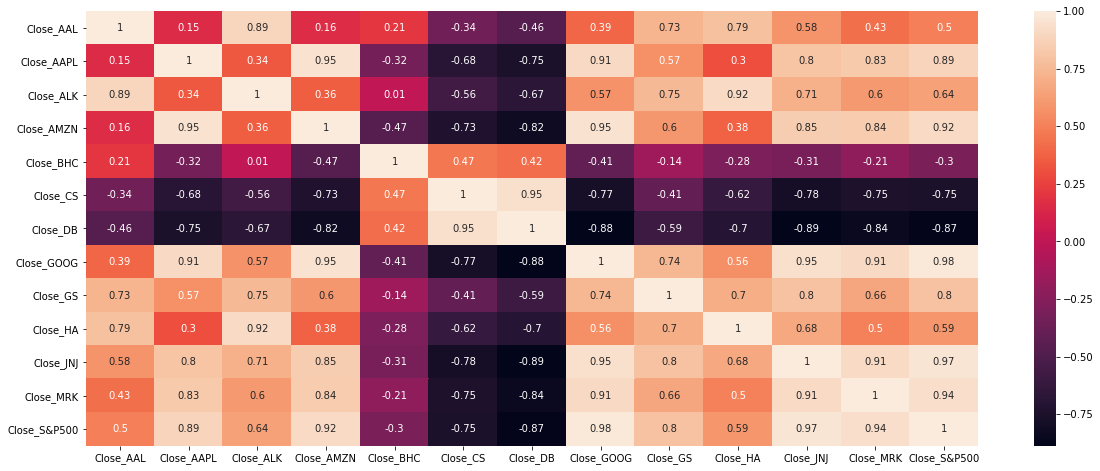

In [32]:
#Plotting the heatmap to identify the correlation in the data set
plt.figure(figsize = (20,8))        # Size of the figure
sns.heatmap(price_df.corr(),annot = True)
plt.show()

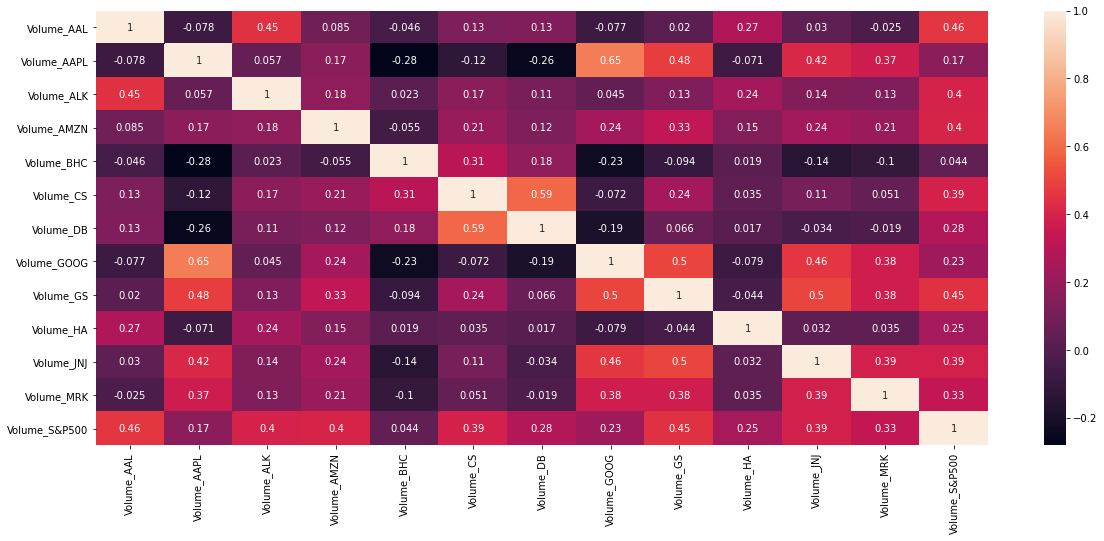

In [33]:
#Plotting the heatmap to identify the correlation in the data set
plt.figure(figsize = (20,8))        # Size of the figure
sns.heatmap(volume_df.corr(),annot = True)
plt.show()

As we can see there are couple of stocks that are correlated with each other. 
It is tricky to choose stocks here, because if we choose stocks that are positively correletated then risk becomes Huge because if one stock falls then other is also likely to fall. If we choose stocks that negatively correlated then it would appear to be good bet because risk reduces here, as one stock falls other will rise but the profit also gets limited.

We will go with the stocks correlated with S&P500, so the stocks that are positively correlated with S&P500 we will choose and we will drop the ones that are negatively correlated.


Let`s see the Outliers

sp500 has positive correlation with mrk,aapl,amzn,goog
- goog has positive correlation with mrk,aapl,amzn & negatively correlation with cs,db
- amzn has negative ccorrelation with cs,db & positive correlation with aapl,mrk


S&P500 is negatively correlated with Close_CS, Close_DB

In [34]:
# lets drop Close_CS, CLose_DB

price_df=price_df.drop(['Close_CS','Close_DB'],axis=1)
price_df.head()

,Close_AAL,Close_AAPL,Close_ALK,Close_AMZN,Close_BHC,Close_GOOG,Close_GS,Close_HA,Close_JNJ,Close_MRK,Close_S&P500
Date,,,,,,,,,,,
01-10-2010,9.29,10.090000,12.4475,153.710007,25.750000,261.828613,147.699997,5.96,61.750000,36.599998,1146.239990
04-10-2010,9.12,9.951428,12.1425,155.389999,25.870001,260.199707,146.570007,5.75,61.669998,36.520000,1137.030029
05-10-2010,9.23,10.319285,12.2150,160.869995,26.299999,268.110046,149.570007,5.85,62.799999,37.020000,1160.750000
06-10-2010,9.23,10.328215,12.1875,155.399994,26.690001,266.177307,150.839996,5.97,63.209999,37.009998,1159.969971
07-10-2010,9.24,10.329286,11.6250,156.270004,26.600000,264.015411,151.110001,6.15,63.220001,36.709999,1158.060059


In [35]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
price_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Close_AAL,Close_AAPL,Close_ALK,Close_AMZN,Close_BHC,Close_GOOG,Close_GS,Close_HA,Close_JNJ,Close_MRK,Close_S&P500
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,29.397636,33.454670,50.031176,854.636107,61.880687,730.426139,179.598184,22.870413,105.277378,57.161053,2111.392732
std,15.211889,20.630118,24.187020,745.201139,57.170002,364.685720,42.405475,15.483034,28.174233,15.164505,612.227235
min,4.000000,9.951428,11.620000,153.029999,8.510000,236.553345,87.699997,3.780000,57.660000,29.809999,1099.229980
25%,13.010000,18.961428,26.780001,266.489990,22.170000,403.642059,154.990005,7.030000,81.930000,45.730000,1562.170044
50%,32.520000,27.592501,58.540001,533.750000,38.759998,651.789978,177.229996,21.910000,104.040001,57.180000,2071.219971
75%,42.200001,42.962502,67.260002,1500.000000,90.269997,1055.810059,211.580002,36.900002,130.979996,64.089996,2656.300049
90%,48.524000,56.760500,79.971999,1883.970020,139.426004,1229.462036,237.092002,45.738000,140.765997,81.370003,2932.953955
95%,51.203999,77.379002,87.246002,2137.870117,202.710001,1393.513965,245.797995,49.170002,146.256006,84.341996,3128.569971
99%,54.310400,112.979602,95.120003,3162.044795,239.427202,1521.840821,262.873992,56.234000,150.507204,89.087198,3373.169199


It appears that price_df does not has outliers.

In [36]:
volume_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Volume_AAL,Volume_AAPL,Volume_ALK,Volume_AMZN,Volume_BHC,Volume_CS,Volume_DB,Volume_GOOG,Volume_GS,Volume_HA,Volume_JNJ,Volume_MRK,Volume_S&P500
count,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03
mean,1.263146e+07,2.635459e+08,1.648085e+06,4.326001e+06,7.194057e+06,2.476788e+06,3.677383e+06,2.951427e+06,3.833079e+06,9.365502e+05,8.605432e+06,1.193947e+07,3.739228e+09
std,2.149322e+07,2.037493e+08,1.095121e+06,2.410250e+06,1.121985e+07,1.847826e+06,3.553901e+06,2.460964e+06,2.187223e+06,6.485618e+05,4.493037e+06,6.218030e+06,8.805742e+08
min,1.158400e+06,3.247000e+07,2.706000e+05,8.813000e+05,3.803000e+05,2.050000e+05,0.000000e+00,7.900000e+03,4.677000e+05,1.205000e+05,2.353800e+06,2.235900e+06,1.025000e+09
25%,5.368800e+06,1.180676e+08,1.087600e+06,2.769400e+06,1.677300e+06,1.275300e+06,1.527400e+06,1.393000e+06,2.443200e+06,5.395000e+05,5.959500e+06,8.222000e+06,3.241030e+09
50%,7.405700e+06,1.935080e+08,1.399400e+06,3.710900e+06,3.203800e+06,2.020700e+06,2.767400e+06,2.030500e+06,3.243900e+06,7.699000e+05,7.737300e+06,1.055070e+07,3.591270e+09
75%,1.078520e+07,3.505768e+08,1.880800e+06,5.111000e+06,7.874000e+06,3.124000e+06,4.697800e+06,3.966700e+06,4.587600e+06,1.133000e+06,1.002030e+07,1.369570e+07,4.060610e+09
90%,1.790366e+07,5.302287e+08,2.678080e+06,6.963540e+06,1.716904e+07,4.497940e+06,7.172700e+06,5.708720e+06,6.381720e+06,1.638940e+06,1.276514e+07,1.804810e+07,4.729522e+09
95%,4.686534e+07,6.564275e+08,3.274300e+06,8.789960e+06,2.636730e+07,5.715120e+06,9.428840e+06,6.922660e+06,7.844560e+06,2.051520e+06,1.521010e+07,2.203732e+07,5.272054e+09
99%,1.144872e+08,1.009062e+09,5.572752e+06,1.384037e+07,5.609535e+07,9.468984e+06,1.650418e+07,1.197743e+07,1.193073e+07,3.262572e+06,2.449036e+07,3.862272e+07,7.037227e+09


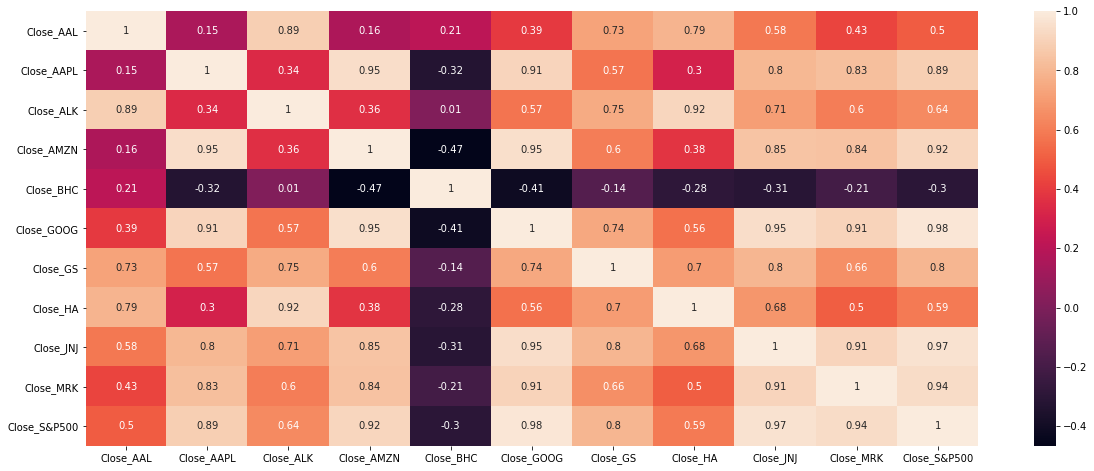

In [37]:
# lets have a look at correlation once again
#Plotting the heatmap to identify the correlation in the data set
plt.figure(figsize = (20,8))        # Size of the figure
sns.heatmap(price_df.corr(),annot = True)
plt.show()

- We can also see Close_BHC is also negatively correlated with S&P500
Lets drop Close_BHC 

In [38]:
price_df=price_df.drop(['Close_BHC'],axis=1)
price_df.head()

,Close_AAL,Close_AAPL,Close_ALK,Close_AMZN,Close_GOOG,Close_GS,Close_HA,Close_JNJ,Close_MRK,Close_S&P500
Date,,,,,,,,,,
01-10-2010,9.29,10.090000,12.4475,153.710007,261.828613,147.699997,5.96,61.750000,36.599998,1146.239990
04-10-2010,9.12,9.951428,12.1425,155.389999,260.199707,146.570007,5.75,61.669998,36.520000,1137.030029
05-10-2010,9.23,10.319285,12.2150,160.869995,268.110046,149.570007,5.85,62.799999,37.020000,1160.750000
06-10-2010,9.23,10.328215,12.1875,155.399994,266.177307,150.839996,5.97,63.209999,37.009998,1159.969971
07-10-2010,9.24,10.329286,11.6250,156.270004,264.015411,151.110001,6.15,63.220001,36.709999,1158.060059


Since we have dropped the closing price for the stocks Close_CS,Close_DB and Close_BHC, so lets drop the same stocks from volume_df

In [39]:
volume_df=volume_df.drop(['Volume_CS','Volume_DB','Volume_BHC'],axis=1)
volume_df

,Volume_AAL,Volume_AAPL,Volume_ALK,Volume_AMZN,Volume_GOOG,Volume_GS,Volume_HA,Volume_JNJ,Volume_MRK,Volume_S&P500
Date,,,,,,,,,,
01-10-2010,3603800,448142800,1663600.0,8683400.0,4466600.0,7439800.0,645400.0,9773200.0,11741900.0,4298910000
04-10-2010,3856800,435302000,1512400.0,5346500.0,3895400.0,5866700.0,618900.0,8703600.0,9234900.0,3604110000
05-10-2010,3896600,501967200,2567200.0,5620000.0,7040400.0,8724700.0,534800.0,12439400.0,10669200.0,4068840000
06-10-2010,3230200,670868800,1043600.0,6060800.0,5545200.0,6330600.0,2563900.0,11339800.0,7541300.0,4073160000
07-10-2010,3877700,408399600,7682400.0,4622000.0,4809400.0,4471500.0,1115200.0,9826600.0,13897800.0,3910550000
...,...,...,...,...,...,...,...,...,...,...
24-09-2020,49163200,167743300,3326000.0,5529400.0,1450200.0,5114600.0,879700.0,5614800.0,7485000.0,4599470000
25-09-2020,43764000,149981400,1767600.0,4615200.0,1323000.0,3106000.0,923400.0,5531200.0,6614600.0,3792220000
28-09-2020,63558200,137672400,2922800.0,4224200.0,2007900.0,3280100.0,1076800.0,5843200.0,5843200.0,3946060000


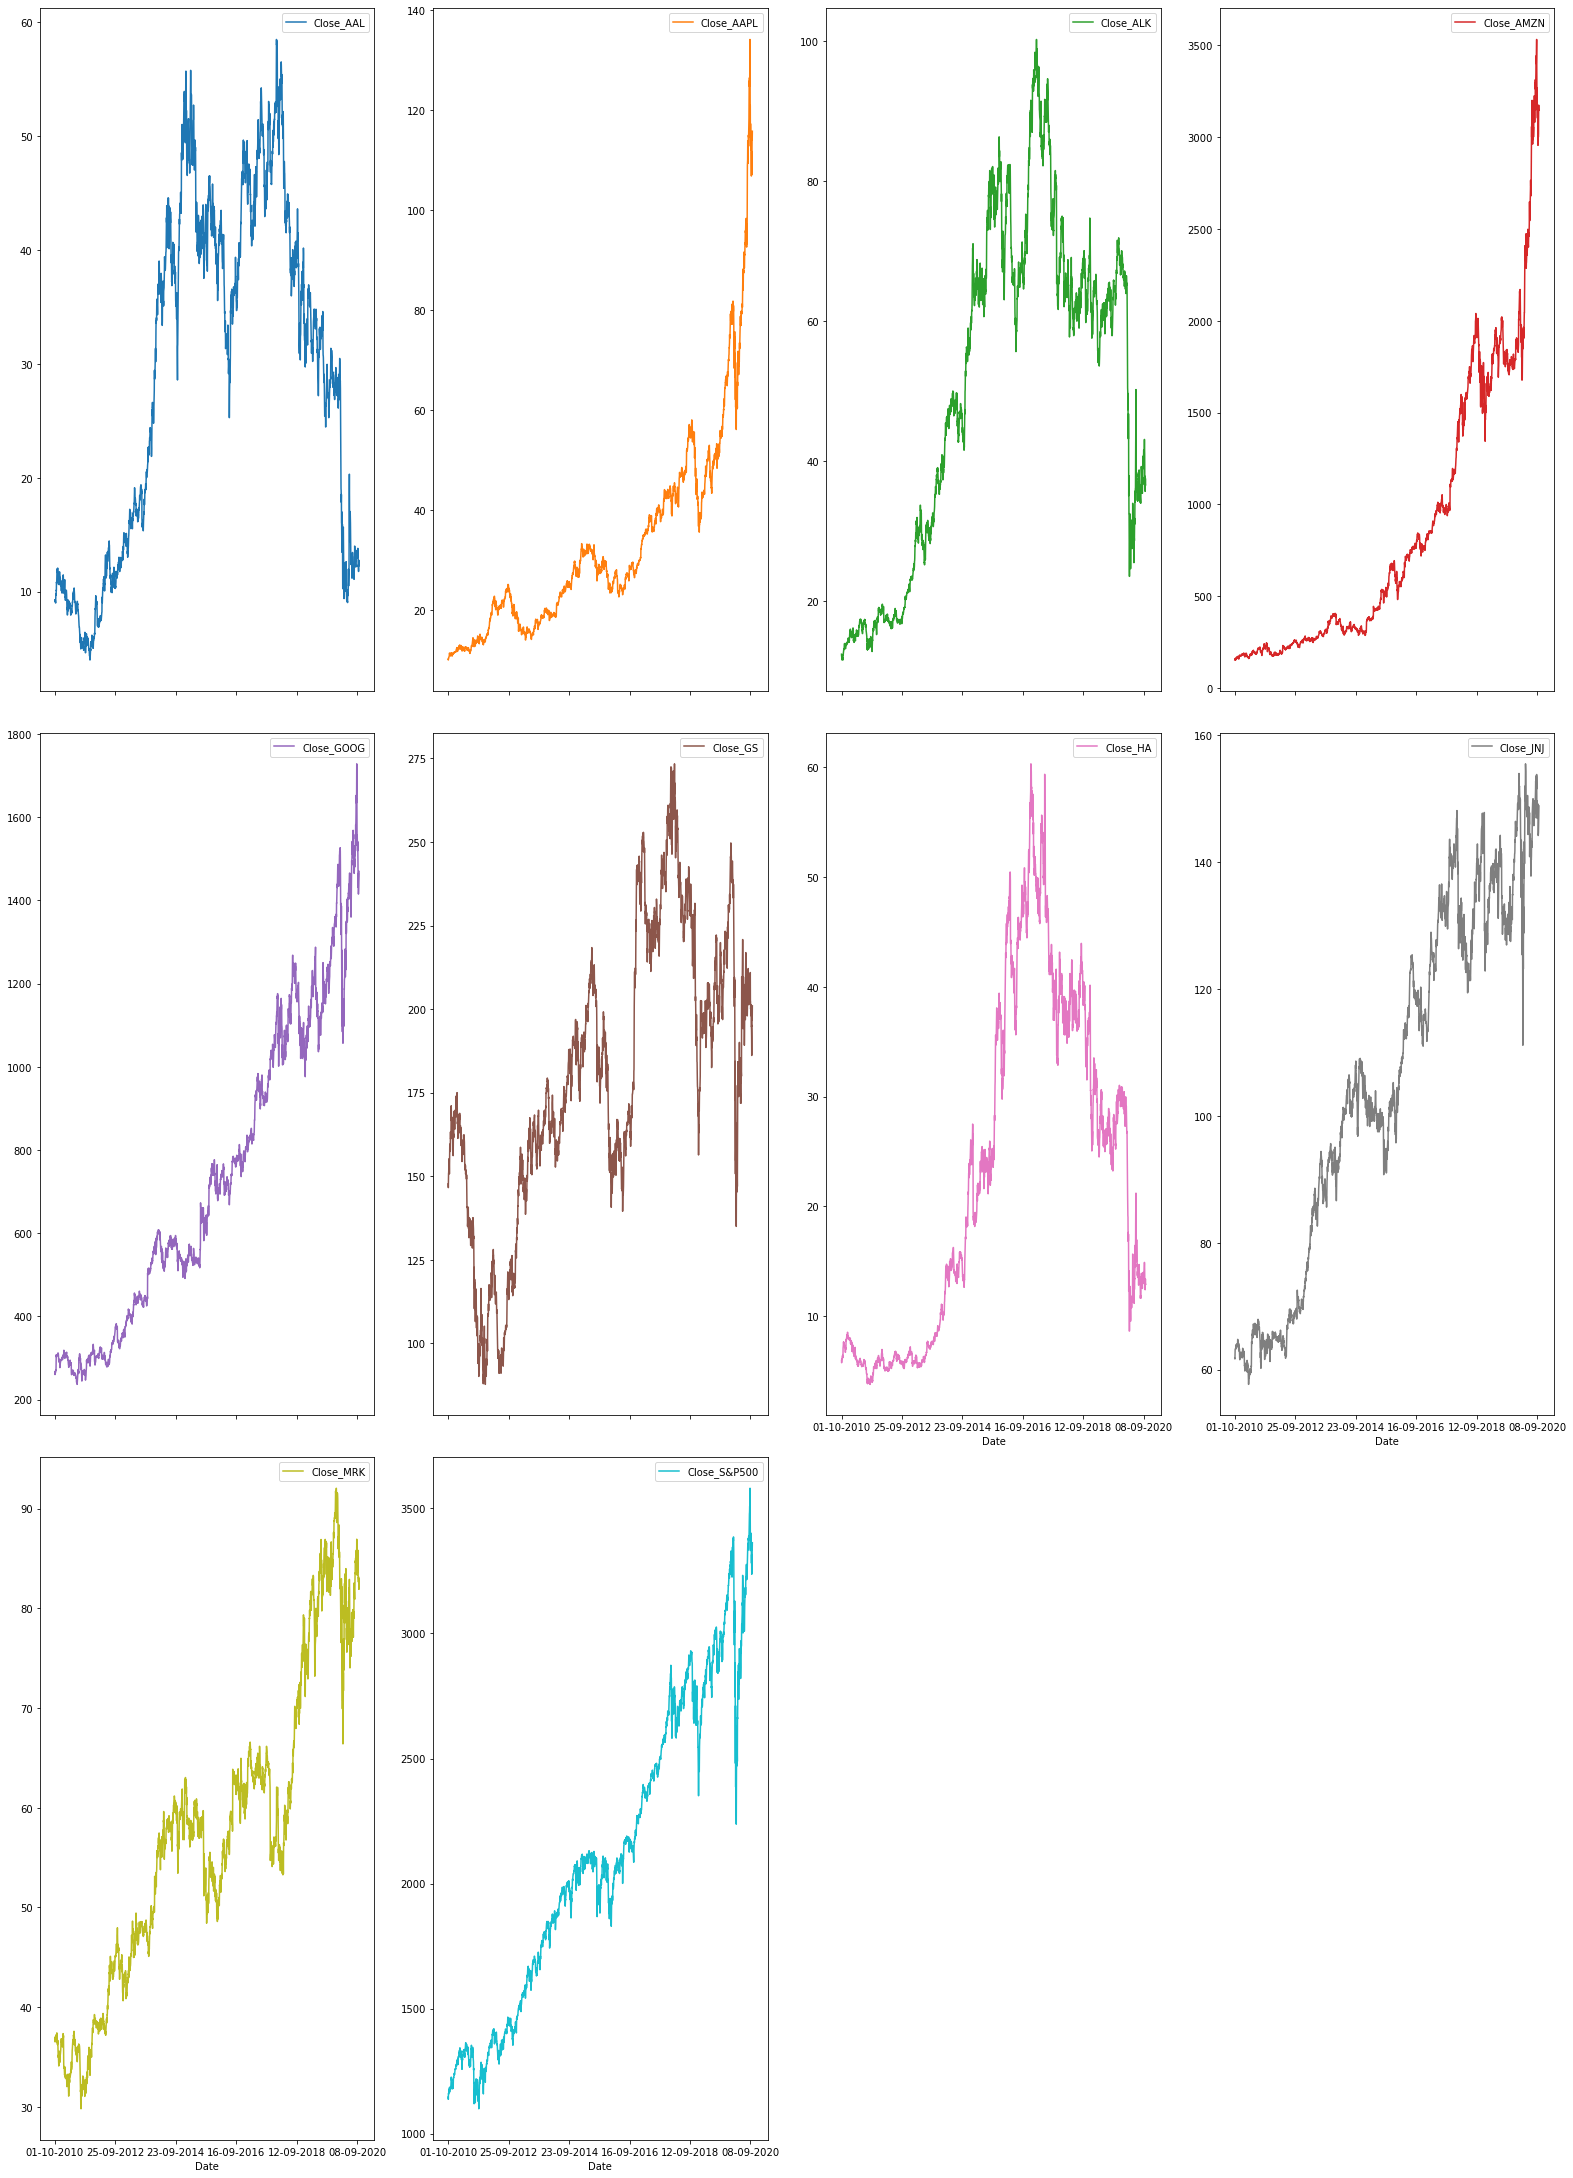

In [40]:
# lets plot and understand the behavior of the stocks over the years

price_df.plot(kind = 'line',subplots=True, layout = (4,4),figsize=(22,40))
plt.tight_layout()
plt.show()

- From the graph we can see that there are couple of stocks that show upward trend.
- We can see that Stocks for AAL, ALK and HA have a downward trend and also it can be seen that stock prices have been falling for quite some time. It clearly appears that these stocks would not be good choice for our portfolio. 

But lets see the stock behaviors when compared to S&P500 index as well.

Lets plot and check the stocks behavior with S&P500 index.


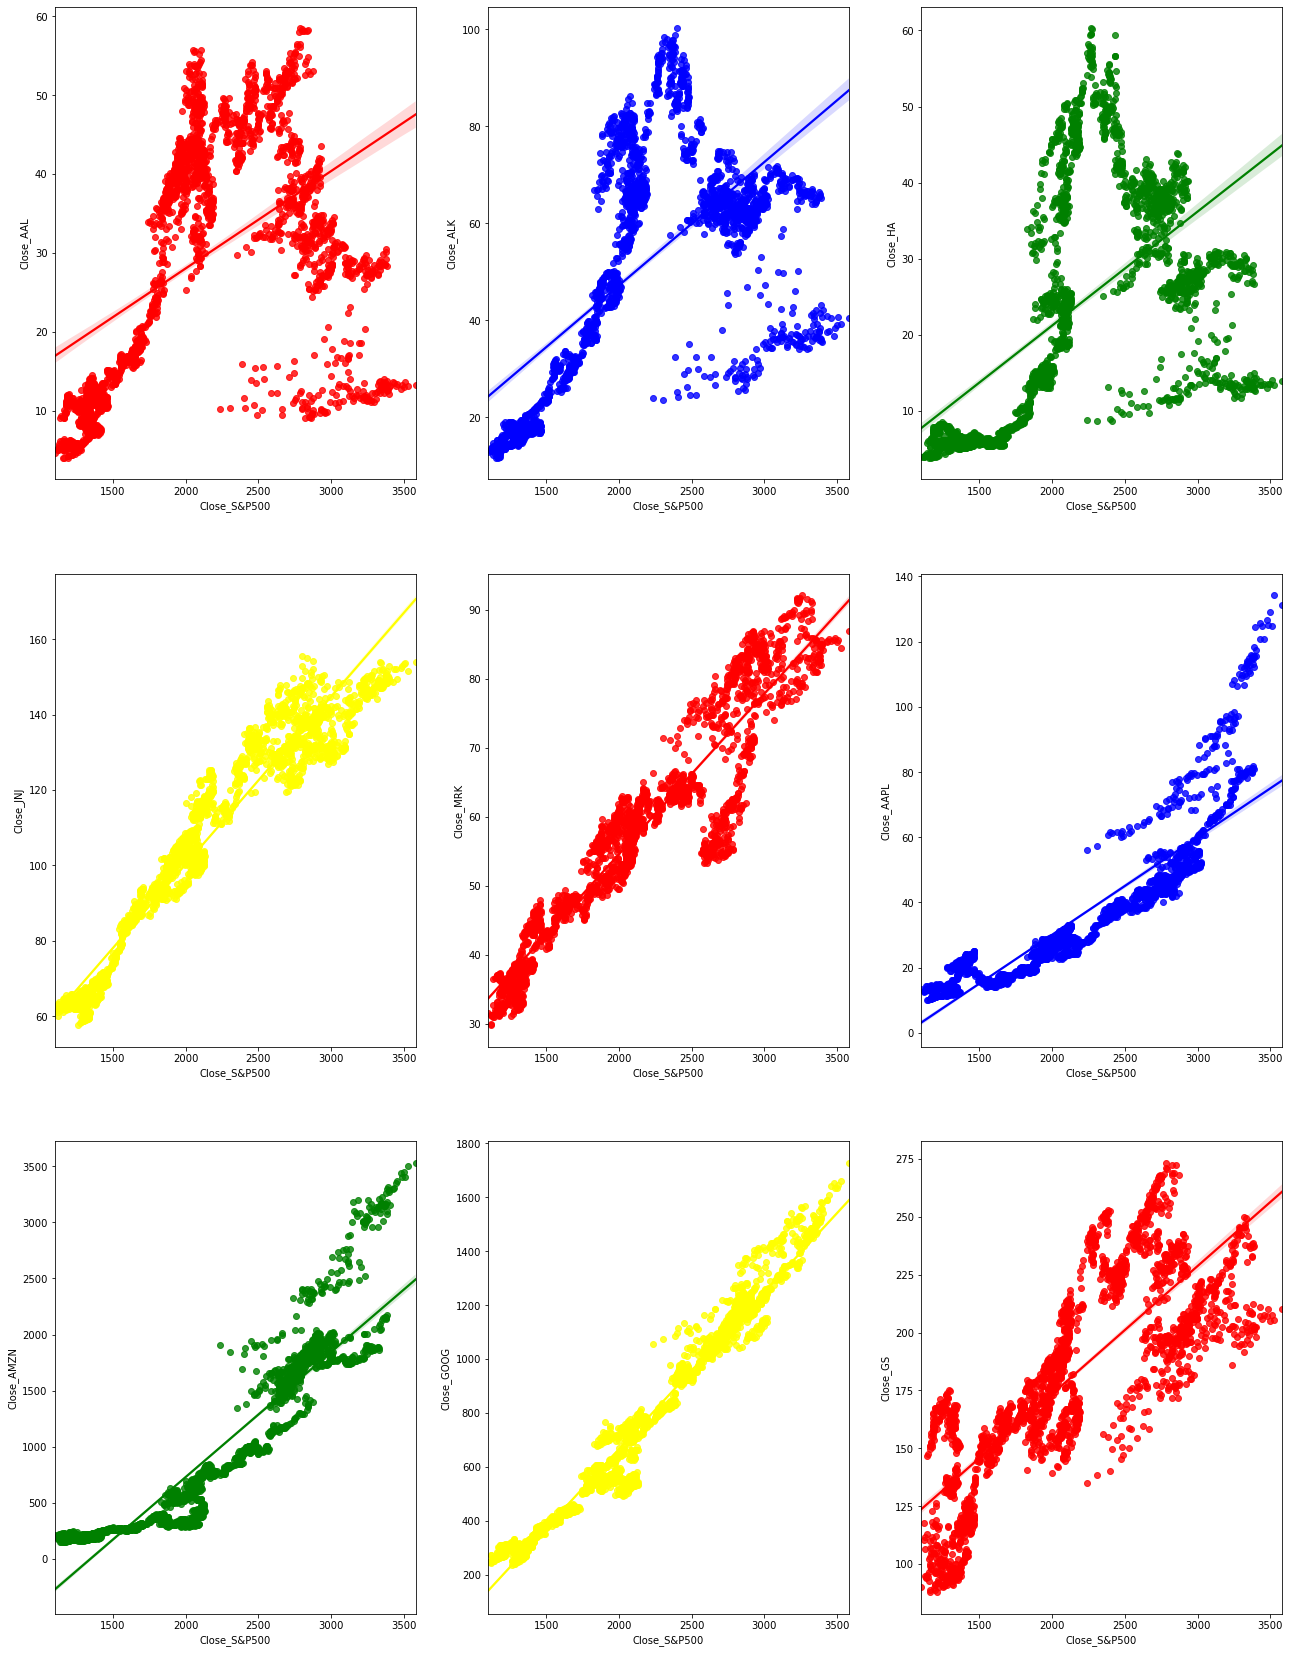

In [41]:
plt.figure(figsize = [22,40])
plt.subplot(4,3,1)
sns.regplot(data = price_df, x = "Close_S&P500",y = "Close_AAL",color="red")
plt.subplot(4,3,2)
sns.regplot(data = price_df, x = "Close_S&P500",y = "Close_ALK",color="blue")
plt.subplot(4,3,3)
sns.regplot(data = price_df, x = "Close_S&P500",y = "Close_HA",color="green")
plt.subplot(4,3,4)
sns.regplot(data = price_df, x = "Close_S&P500",y = "Close_JNJ",color="yellow")
plt.subplot(4,3,5)
sns.regplot(data = price_df, x = "Close_S&P500",y = "Close_MRK",color="red")
plt.subplot(4,3,6)
sns.regplot(data = price_df, x = "Close_S&P500",y = "Close_AAPL",color="blue")
plt.subplot(4,3,7)
sns.regplot(data = price_df, x = "Close_S&P500",y = "Close_AMZN",color="green")
plt.subplot(4,3,8)
sns.regplot(data = price_df, x = "Close_S&P500",y = "Close_GOOG",color="yellow")
plt.subplot(4,3,9)
sns.regplot(data = price_df, x = "Close_S&P500",y = "Close_GS",color="red")
plt.show()

We have got a pretty good understanding of the stock with the graph above. It is now clear that Close_AAL, Close_ALK and Close_HA show downward trend as compared to S&P500 index. 

We will drop these stocks from our portfolio.

In [42]:
price_df=price_df.drop(['Close_ALK','Close_AAL','Close_HA'],axis=1)
price_df.head()

,Close_AAPL,Close_AMZN,Close_GOOG,Close_GS,Close_JNJ,Close_MRK,Close_S&P500
Date,,,,,,,
01-10-2010,10.090000,153.710007,261.828613,147.699997,61.750000,36.599998,1146.239990
04-10-2010,9.951428,155.389999,260.199707,146.570007,61.669998,36.520000,1137.030029
05-10-2010,10.319285,160.869995,268.110046,149.570007,62.799999,37.020000,1160.750000
06-10-2010,10.328215,155.399994,266.177307,150.839996,63.209999,37.009998,1159.969971
07-10-2010,10.329286,156.270004,264.015411,151.110001,63.220001,36.709999,1158.060059


Lets drop these stocks from volume_df as well

In [43]:
volume_df=volume_df.drop(['Volume_ALK','Volume_AAL','Volume_HA'],axis=1)
volume_df.head()

,Volume_AAPL,Volume_AMZN,Volume_GOOG,Volume_GS,Volume_JNJ,Volume_MRK,Volume_S&P500
Date,,,,,,,
01-10-2010,448142800,8683400.0,4466600.0,7439800.0,9773200.0,11741900.0,4298910000
04-10-2010,435302000,5346500.0,3895400.0,5866700.0,8703600.0,9234900.0,3604110000
05-10-2010,501967200,5620000.0,7040400.0,8724700.0,12439400.0,10669200.0,4068840000
06-10-2010,670868800,6060800.0,5545200.0,6330600.0,11339800.0,7541300.0,4073160000
07-10-2010,408399600,4622000.0,4809400.0,4471500.0,9826600.0,13897800.0,3910550000


In [44]:
price_df_original=price_df.copy()
price_df_original.to_csv('price_df_original.csv')

In [45]:
price_df.head()

,Close_AAPL,Close_AMZN,Close_GOOG,Close_GS,Close_JNJ,Close_MRK,Close_S&P500
Date,,,,,,,
01-10-2010,10.090000,153.710007,261.828613,147.699997,61.750000,36.599998,1146.239990
04-10-2010,9.951428,155.389999,260.199707,146.570007,61.669998,36.520000,1137.030029
05-10-2010,10.319285,160.869995,268.110046,149.570007,62.799999,37.020000,1160.750000
06-10-2010,10.328215,155.399994,266.177307,150.839996,63.209999,37.009998,1159.969971
07-10-2010,10.329286,156.270004,264.015411,151.110001,63.220001,36.709999,1158.060059


In [46]:
volume_df_original=volume_df.copy()
volume_df_original.to_csv('volume_df_original.csv')

In [47]:
volume_df_original.head()

,Volume_AAPL,Volume_AMZN,Volume_GOOG,Volume_GS,Volume_JNJ,Volume_MRK,Volume_S&P500
Date,,,,,,,
01-10-2010,448142800,8683400.0,4466600.0,7439800.0,9773200.0,11741900.0,4298910000
04-10-2010,435302000,5346500.0,3895400.0,5866700.0,8703600.0,9234900.0,3604110000
05-10-2010,501967200,5620000.0,7040400.0,8724700.0,12439400.0,10669200.0,4068840000
06-10-2010,670868800,6060800.0,5545200.0,6330600.0,11339800.0,7541300.0,4073160000
07-10-2010,408399600,4622000.0,4809400.0,4471500.0,9826600.0,13897800.0,3910550000


Now our data looks to be ready. Let do some data engineering and normalize the data.


## Normalize each stock

In [48]:
# Normalizing the Data 
for column in price_df.columns:
     price_df[column] = price_df[column]  / price_df[column][0]

In [49]:
price_df.head()

,Close_AAPL,Close_AMZN,Close_GOOG,Close_GS,Close_JNJ,Close_MRK,Close_S&P500
Date,,,,,,,
01-10-2010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
04-10-2010,0.986266,1.010930,0.993779,0.992349,0.998704,0.997814,0.991965
05-10-2010,1.022724,1.046581,1.023991,1.012661,1.017004,1.011475,1.012659
06-10-2010,1.023609,1.010995,1.016609,1.021259,1.023644,1.011202,1.011978
07-10-2010,1.023715,1.016655,1.008352,1.023087,1.023806,1.003005,1.010312


Lets look at the plot once after normalization

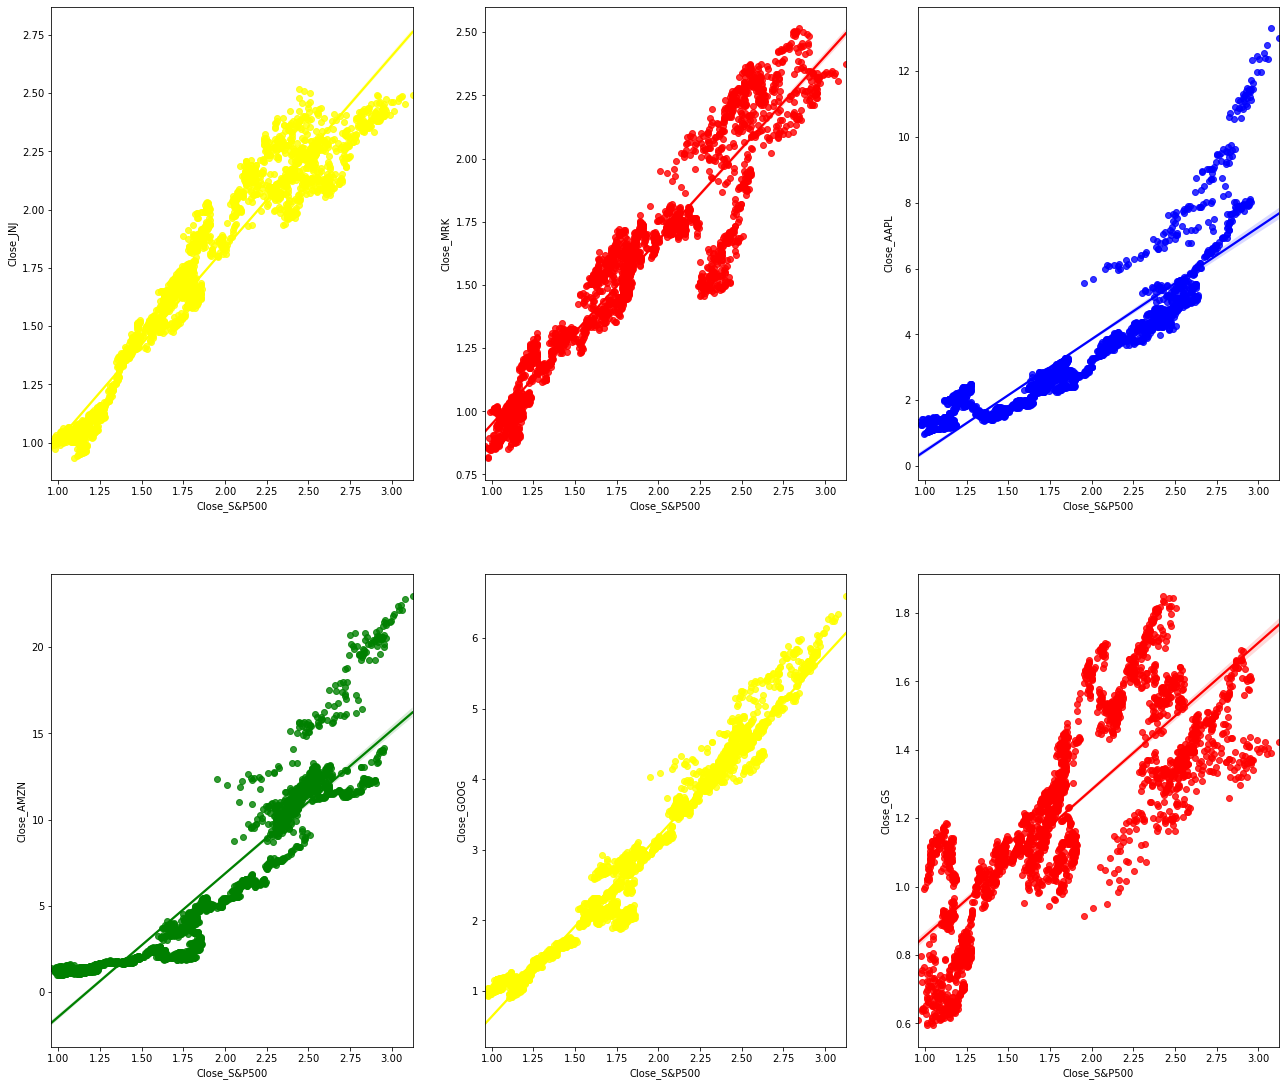

In [50]:
plt.figure(figsize = [22,40])

plt.subplot(4,3,1)
sns.regplot(data = price_df, x = "Close_S&P500",y = "Close_JNJ",color="yellow")
plt.subplot(4,3,2)
sns.regplot(data = price_df, x = "Close_S&P500",y = "Close_MRK",color="red")
plt.subplot(4,3,3)
sns.regplot(data = price_df, x = "Close_S&P500",y = "Close_AAPL",color="blue")
plt.subplot(4,3,4)
sns.regplot(data = price_df, x = "Close_S&P500",y = "Close_AMZN",color="green")
plt.subplot(4,3,5)
sns.regplot(data = price_df, x = "Close_S&P500",y = "Close_GOOG",color="yellow")
plt.subplot(4,3,6)
sns.regplot(data = price_df, x = "Close_S&P500",y = "Close_GS",color="red")
plt.show()

After normalization the graph has become more readable.

### Daily returns

In [51]:
# compute daily returns using pandas pct_change()
price_df_daily_returns = price_df.pct_change()
# skip first row with NA 
price_df_daily_returns = price_df_daily_returns.dropna(axis=0)
price_df_daily_returns.head()

,Close_AAPL,Close_AMZN,Close_GOOG,Close_GS,Close_JNJ,Close_MRK,Close_S&P500
Date,,,,,,,
04-10-2010,-0.013734,0.010930,-0.006221,-0.007651,-0.001296,-0.002186,-0.008035
05-10-2010,0.036965,0.035266,0.030401,0.020468,0.018323,0.013691,0.020861
06-10-2010,0.000865,-0.034003,-0.007209,0.008491,0.006529,-0.000270,-0.000672
07-10-2010,0.000104,0.005599,-0.008122,0.001790,0.000158,-0.008106,-0.001647
08-10-2010,0.016769,-0.004607,0.011962,0.010257,0.000158,0.005448,0.006122


<AxesSubplot:xlabel='Date'>

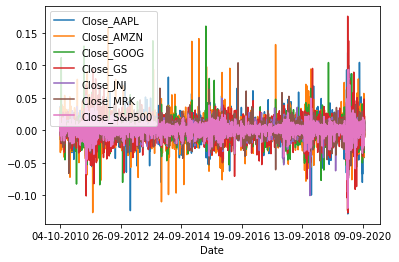

In [52]:
# Plotting the series to understand the correlation
price_df_daily_returns.plot()

### Average daily return from each stock

In [53]:
# Average daily return from each stock
price_df_daily_returns_mean = price_df_daily_returns.mean()
print(price_df_daily_returns_mean)

Close_AAPL      0.001128
Close_AMZN      0.001398
Close_GOOG      0.000818
Close_GS        0.000291
Close_JNJ       0.000409
Close_MRK       0.000410
Close_S&P500    0.000488
dtype: float64


In [54]:
# Calculate the cumulative daily returns
price_df_cum_daily_returns = (1 + price_df_daily_returns[1:]).cumprod() - 1

#portfolio_price_cum_daily_returns = portfolio_price_cum_daily_returns.reset_index()
price_df_cum_daily_returns.head().apply(lambda s: s.apply('{0:.2f}'.format))

,Close_AAPL,Close_AMZN,Close_GOOG,Close_GS,Close_JNJ,Close_MRK,Close_S&P500
Date,,,,,,,
05-10-2010,0.04,0.04,0.03,0.02,0.02,0.01,0.02
06-10-2010,0.04,0.00,0.02,0.03,0.02,0.01,0.02
07-10-2010,0.04,0.01,0.01,0.03,0.03,0.01,0.02
08-10-2010,0.06,0.00,0.03,0.04,0.03,0.01,0.02
11-10-2010,0.06,-0.02,0.03,0.04,0.03,0.01,0.02


In [55]:
cum_return = price_df_cum_daily_returns.tail(1)
cum_return * 100

,Close_AAPL,Close_AMZN,Close_GOOG,Close_GS,Close_JNJ,Close_MRK,Close_S&P500
Date,,,,,,,
30-09-2020,1063.752559,1926.340177,464.796937,37.115366,141.413994,127.135808,195.770553


In [56]:
cummulative_return=round((cum_return*100),2).stack().sort_values(ascending=False).reset_index().set_axis(['Date','stock','cumm_return'], axis=1)

In [57]:
cummulative_return.drop(columns='Date',axis=1,inplace=True)
cummulative_return

,stock,cumm_return
0,Close_AMZN,1926.34
1,Close_AAPL,1063.75
2,Close_GOOG,464.80
3,Close_S&P500,195.77
4,Close_JNJ,141.41
5,Close_MRK,127.14
6,Close_GS,37.12


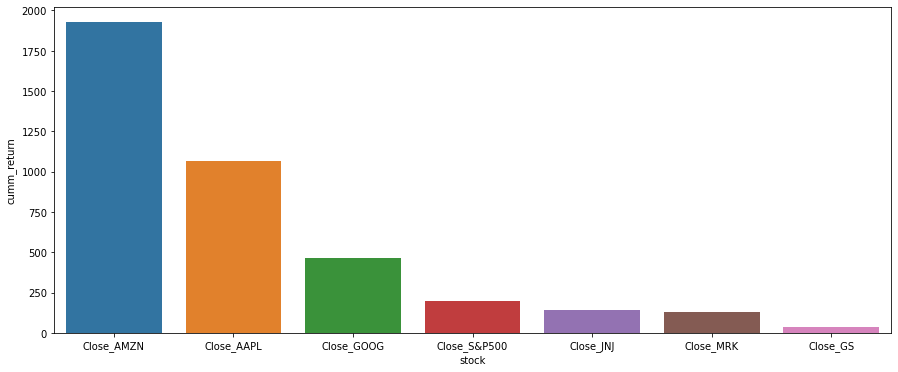

In [58]:
plt.figure(figsize = [15,6])
sns.barplot(x='stock', y='cumm_return', data=cummulative_return)
plt.show()

In [59]:
pcnt_returns = price_df_daily_returns.aggregate(['sum','max', 'min','mean','std','count'])
pcnt_returns

,Close_AAPL,Close_AMZN,Close_GOOG,Close_GS,Close_JNJ,Close_MRK,Close_S&P500
sum,2.837128,3.516422,2.056963,0.730961,1.028453,1.032212,1.227708
max,0.119808,0.157457,0.160524,0.175803,0.079977,0.104080,0.093828
min,-0.128647,-0.126568,-0.111008,-0.127053,-0.100379,-0.088990,-0.119841
mean,0.001128,0.001398,0.000818,0.000291,0.000409,0.000410,0.000488
std,0.017719,0.019889,0.016288,0.018331,0.010847,0.013049,0.010934
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000


### Annual returns

In [60]:
annual_price_df_returns=pcnt_returns.iloc[3]*252*100
annual_price_df_returns

Close_AAPL      28.416386
Close_AMZN      35.220120
Close_GOOG      20.602336
Close_GS         7.321234
Close_JNJ       10.300879
Close_MRK       10.338527
Close_S&P500    12.296594
Name: mean, dtype: float64

In [61]:
annualized_price_df_returns=annual_price_df_returns.sort_values(ascending=False).reset_index().set_axis(['stock','annual_return'], axis=1)
annualized_price_df_returns

,stock,annual_return
0,Close_AMZN,35.220120
1,Close_AAPL,28.416386
2,Close_GOOG,20.602336
3,Close_S&P500,12.296594
4,Close_MRK,10.338527
5,Close_JNJ,10.300879
6,Close_GS,7.321234


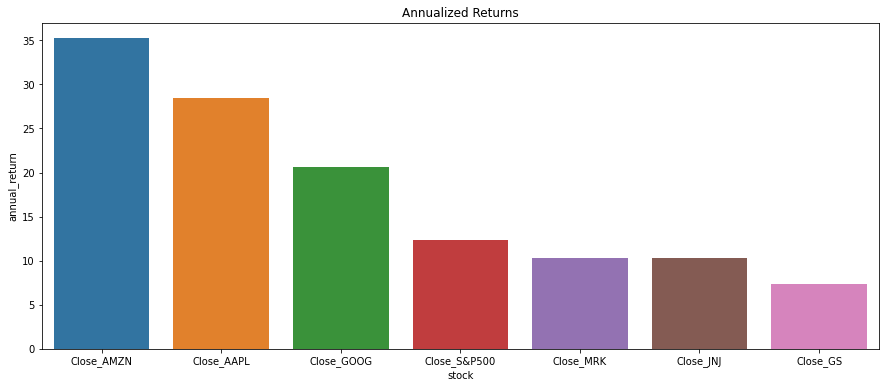

In [62]:
plt.figure(figsize = [15,6])
sns.barplot(x='stock', y='annual_return', data=annualized_price_df_returns)
plt.title('Annualized Returns')
plt.show()

## Annual risk

In [63]:
price_df_annual_risk=pcnt_returns.iloc[4]*math.sqrt(252)*100

In [64]:
price_df_annualized_risk= price_df_annual_risk.sort_values(ascending=True).reset_index().set_axis(['stock','annual_risk'], axis=1)
price_df_annualized_risk

,stock,annual_risk
0,Close_JNJ,17.218738
1,Close_S&P500,17.357439
2,Close_MRK,20.714241
3,Close_GOOG,25.856093
4,Close_AAPL,28.127302
5,Close_GS,29.099614
6,Close_AMZN,31.573504


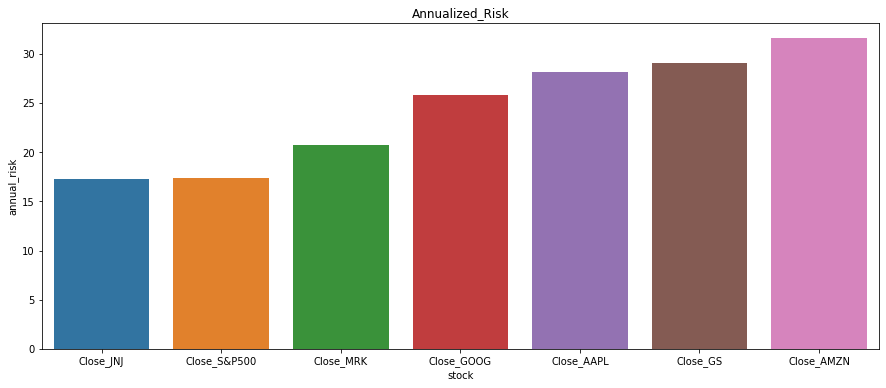

In [65]:
plt.figure(figsize = [15,6])
sns.barplot(x='stock', y='annual_risk', data=price_df_annualized_risk)
plt.title("Annualized_Risk")
plt.show()

We can see that amzn stocks have been showing as good daily return and good annual return but they also show very high annual risk.

### Splitting the data into test and train dataset

In [66]:
#taking the dependent variable on x axis and the independent variable on the y axis
X = price_df_daily_returns[['Close_S&P500']]
X.head()
y=price_df_daily_returns[['Close_GS', 'Close_JNJ', 
      'Close_MRK', 'Close_AAPL', 'Close_AMZN', 'Close_GOOG']]

In [67]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
print(X_train.shape)
y_train.shape

(2012, 1)


(2012, 6)

## Performing Linear regression

In [68]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 [-3.63992080e-04 -6.25370552e-05  1.29183555e-04  3.83715784e-04
  7.70206108e-04  1.84475878e-04]
Coefficients: 
 [[1.28087095]
 [0.66536238]
 [0.74074509]
 [1.07900228]
 [0.98906687]
 [1.0132089 ]]


In [69]:
values = ['Close_GS', 'Close_JNJ', 
      'Close_MRK', 'Close_AAPL', 'Close_AMZN', 'Close_GOOG']

In [70]:
beta_values_df=pd.DataFrame(lm.coef_,index=values).reset_index().set_axis(['stock','beta_values'], axis=1)
beta_values_df

beta_values_df= beta_values_df.sort_values(by=['beta_values'],ascending=True)
beta_values_df

,stock,beta_values
1,Close_JNJ,0.665362
2,Close_MRK,0.740745
4,Close_AMZN,0.989067
5,Close_GOOG,1.013209
3,Close_AAPL,1.079002
0,Close_GS,1.280871


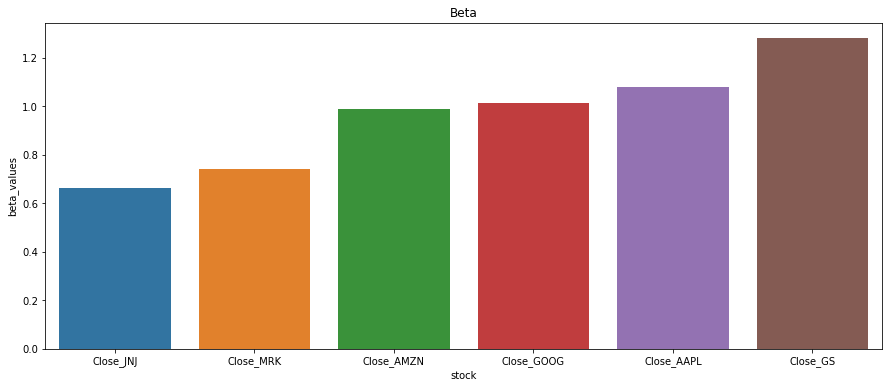

In [71]:
plt.figure(figsize = [15,6])
sns.barplot(x='stock', y='beta_values', data=beta_values_df)
plt.title("Beta")
plt.show()

We can see from above plot that the stocks for AMZN, GOOG and AAPL have beta values very close to 1, so lets get the beta values and intercept values for these stocks in a data frame

In [72]:
slope, intercept, r_value, p_value, std_err = stats.linregress(price_df_daily_returns['Close_S&P500']
                                                               ,price_df_daily_returns['Close_AMZN'])

intrecept_df = pd.DataFrame({'stock':['Close_AMZN'], 'beta': [slope], 'intercept': [intercept]})
slope, intercept, r_value, p_value, std_err = stats.linregress(price_df_daily_returns['Close_S&P500']
                                                               ,price_df_daily_returns['Close_GOOG'])
tempResults = pd.DataFrame({'stock':['Close_GOOG'], 'beta': [slope], 'intercept': [intercept] })
intrecept_df = pd.concat([intrecept_df, tempResults])

slope, intercept, r_value, p_value, std_err = stats.linregress(price_df_daily_returns['Close_S&P500']
                                                               ,price_df_daily_returns['Close_AAPL'])
tempResults1 = pd.DataFrame({'stock':['Close_AAPL'], 'beta': [slope], 'intercept': [intercept] })
intrecept_df = pd.concat([intrecept_df, tempResults1])
final =intrecept_df[['stock', 'beta', 'intercept']]
final

,stock,beta,intercept
0,Close_AMZN,0.998802,0.000910
0,Close_GOOG,1.013338,0.000323
0,Close_AAPL,1.063349,0.000609


In a similar way lets create a dataframe with beta values and intercepts for other stocks as well.


In [73]:
slope, intercept, r_value, p_value, std_err = stats.linregress(price_df_daily_returns['Close_S&P500']
                                                               ,price_df_daily_returns['Close_JNJ'])

intrecept_df_other = pd.DataFrame({'stock':['Close_JNJ'], 'beta': [slope], 'intercept': [intercept]})

slope, intercept, r_value, p_value, std_err = stats.linregress(price_df_daily_returns['Close_S&P500']
                                                               ,price_df_daily_returns['Close_MRK'])
tempResults_other = pd.DataFrame({'stock':['Close_MRK'], 'beta': [slope], 'intercept': [intercept] })
intrecept_df_other = pd.concat([intrecept_df_other, tempResults_other])

slope, intercept, r_value, p_value, std_err = stats.linregress(price_df_daily_returns['Close_S&P500']
                                                               ,price_df_daily_returns['Close_GS'])
tempResults1_other = pd.DataFrame({'stock':['Close_GS'], 'beta': [slope], 'intercept': [intercept] })
intrecept_df_other = pd.concat([intrecept_df_other,tempResults1_other])
final_other =intrecept_df_other[['stock', 'beta', 'intercept']]
final_other 

,stock,beta,intercept
0,Close_JNJ,0.662233,0.000086
0,Close_MRK,0.733475,0.000052
0,Close_GS,1.301286,-0.000344


In [74]:
slope, intercept, r_value, p_value, std_err = stats.linregress(price_df_daily_returns['Close_S&P500']
                                                               ,price_df_daily_returns['Close_S&P500'])
tempResults_new = pd.DataFrame({'stock':['Close_S&P500'], 'beta': [slope], 'intercept': [intercept] })
intrecept_df_other = pd.concat([tempResults_new])
results_sp500 =intrecept_df_other[['stock', 'beta', 'intercept']]
results_sp500

,stock,beta,intercept
0,Close_S&P500,1.0,0.0


In [75]:
final_df=final.append(final_other.append(results_sp500))

In [76]:
final_df

,stock,beta,intercept
0,Close_AMZN,0.998802,0.000910
0,Close_GOOG,1.013338,0.000323
0,Close_AAPL,1.063349,0.000609
0,Close_JNJ,0.662233,0.000086
0,Close_MRK,0.733475,0.000052
0,Close_GS,1.301286,-0.000344
0,Close_S&P500,1.000000,0.000000


In [77]:
final_df.merge(beta_values_df, on='stock')

,stock,beta,intercept,beta_values
0,Close_AMZN,0.998802,0.000910,0.989067
1,Close_GOOG,1.013338,0.000323,1.013209
2,Close_AAPL,1.063349,0.000609,1.079002
3,Close_JNJ,0.662233,0.000086,0.665362
4,Close_MRK,0.733475,0.000052,0.740745
5,Close_GS,1.301286,-0.000344,1.280871


In [78]:
portfolio_returns_metric=final_df.merge(cummulative_return, on='stock', how='inner')

In [79]:
portfolio_returns_metric=portfolio_returns_metric.merge(annualized_price_df_returns,on='stock',how='inner')

In [80]:
portfolio_returns_metric=portfolio_returns_metric.merge(price_df_annualized_risk, on='stock',how='inner')

In [81]:
portfolio_returns_metric= portfolio_returns_metric.merge(beta_values_df, on='stock', how='outer')

In [82]:
portfolio_returns_metric


,stock,beta,intercept,cumm_return,annual_return,annual_risk,beta_values
0,Close_AMZN,0.998802,0.000910,1926.34,35.220120,31.573504,0.989067
1,Close_GOOG,1.013338,0.000323,464.80,20.602336,25.856093,1.013209
2,Close_AAPL,1.063349,0.000609,1063.75,28.416386,28.127302,1.079002
3,Close_JNJ,0.662233,0.000086,141.41,10.300879,17.218738,0.665362
4,Close_MRK,0.733475,0.000052,127.14,10.338527,20.714241,0.740745
5,Close_GS,1.301286,-0.000344,37.12,7.321234,29.099614,1.280871
6,Close_S&P500,1.000000,0.000000,195.77,12.296594,17.357439,NaN


#### Lets calculate CAPM
- Formula
- E(R_{i}) = R_{f}+\beta_{i}(E(R_{m})-R_{f})
- E(R_{i})	=	capital asset expected return
- R_{f}	=	risk-free rate of interest
- \beta_i	=	sensitivity
- E(R_{m})	=	expected return of the market


In [83]:
Expected_return_mkt= portfolio_returns_metric.iloc[6][4]

In [84]:
Expected_return_mkt

12.29659445161981

In [85]:
risk_free_rate=0.75
a = Expected_return_mkt- risk_free_rate

In [86]:

portfolio_returns_metric['expected_returns'] =  risk_free_rate+ (portfolio_returns_metric['beta']*a)

In [87]:
portfolio_returns_metric

,stock,beta,intercept,cumm_return,annual_return,annual_risk,beta_values,expected_returns
0,Close_AMZN,0.998802,0.000910,1926.34,35.220120,31.573504,0.989067,12.282765
1,Close_GOOG,1.013338,0.000323,464.80,20.602336,25.856093,1.013209,12.450603
2,Close_AAPL,1.063349,0.000609,1063.75,28.416386,28.127302,1.079002,13.028061
3,Close_JNJ,0.662233,0.000086,141.41,10.300879,17.218738,0.665362,8.396536
4,Close_MRK,0.733475,0.000052,127.14,10.338527,20.714241,0.740745,9.219144
5,Close_GS,1.301286,-0.000344,37.12,7.321234,29.099614,1.280871,15.775418
6,Close_S&P500,1.000000,0.000000,195.77,12.296594,17.357439,NaN,12.296594


In [88]:
portfolio_returns_metric= portfolio_returns_metric.set_index('stock')
portfolio_returns_metric

,beta,intercept,cumm_return,annual_return,annual_risk,beta_values,expected_returns
stock,,,,,,,
Close_AMZN,0.998802,0.000910,1926.34,35.220120,31.573504,0.989067,12.282765
Close_GOOG,1.013338,0.000323,464.80,20.602336,25.856093,1.013209,12.450603
Close_AAPL,1.063349,0.000609,1063.75,28.416386,28.127302,1.079002,13.028061
Close_JNJ,0.662233,0.000086,141.41,10.300879,17.218738,0.665362,8.396536
Close_MRK,0.733475,0.000052,127.14,10.338527,20.714241,0.740745,9.219144
Close_GS,1.301286,-0.000344,37.12,7.321234,29.099614,1.280871,15.775418
Close_S&P500,1.000000,0.000000,195.77,12.296594,17.357439,NaN,12.296594


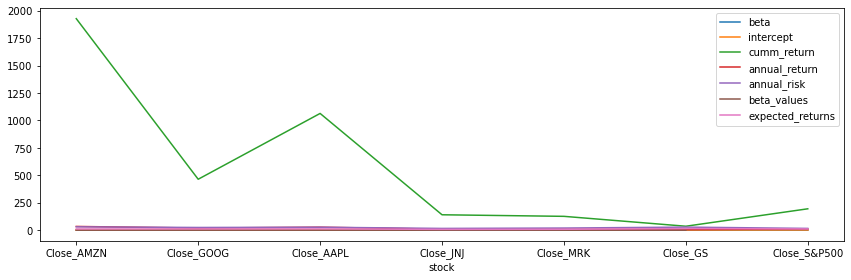

In [89]:
portfolio_returns_metric.plot(figsize=(12,4));
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We can see here that cummulative return for Amzn is very high when compared to others. Annual risk is almost similar to others.

In [90]:
portfolio_returns_metric.to_csv("portfolio_returns_metric.csv")

In [91]:
portfolio_returns_metric= portfolio_returns_metric.reset_index().sort_values(['beta','cumm_return','annual_return','expected_returns','annual_risk'],ascending=[False,False,False,False,False])


In [92]:
portfolio_returns_metric.replace(np.NaN,1,inplace=True)

In [93]:
portfolio_returns_metric

,stock,beta,intercept,cumm_return,annual_return,annual_risk,beta_values,expected_returns
5,Close_GS,1.301286,-0.000344,37.12,7.321234,29.099614,1.280871,15.775418
2,Close_AAPL,1.063349,0.000609,1063.75,28.416386,28.127302,1.079002,13.028061
1,Close_GOOG,1.013338,0.000323,464.80,20.602336,25.856093,1.013209,12.450603
6,Close_S&P500,1.000000,0.000000,195.77,12.296594,17.357439,1.000000,12.296594
0,Close_AMZN,0.998802,0.000910,1926.34,35.220120,31.573504,0.989067,12.282765
4,Close_MRK,0.733475,0.000052,127.14,10.338527,20.714241,0.740745,9.219144
3,Close_JNJ,0.662233,0.000086,141.41,10.300879,17.218738,0.665362,8.396536


From the above table we can understand out of all 6 stocks only 3 stocks are showing more than expected return from S&P500, GS, AAPL and GOOG. Although we can see that annual risk for GS is a bit high. On the other hand we can see that JNJ displays a very low risk but its expected returns are limited.

NOw as we know our client does not want to very high tisk stock in the portfolio. So we can suggest a mixture of stocks. I would recoommend AAPL, GOOG and JNJ for three reasons.
- AAPL and GOOG show good expected returns and JNJ shows average expected returns
- annual risk for JNJ is very less and it would compensate annual risk for AAPL and GOOG
- Also Cummulative resturn for all these three are very good with AAPL doing exceptional.

In [94]:
volume_df

,Volume_AAPL,Volume_AMZN,Volume_GOOG,Volume_GS,Volume_JNJ,Volume_MRK,Volume_S&P500
Date,,,,,,,
01-10-2010,448142800,8683400.0,4466600.0,7439800.0,9773200.0,11741900.0,4298910000
04-10-2010,435302000,5346500.0,3895400.0,5866700.0,8703600.0,9234900.0,3604110000
05-10-2010,501967200,5620000.0,7040400.0,8724700.0,12439400.0,10669200.0,4068840000
06-10-2010,670868800,6060800.0,5545200.0,6330600.0,11339800.0,7541300.0,4073160000
07-10-2010,408399600,4622000.0,4809400.0,4471500.0,9826600.0,13897800.0,3910550000
...,...,...,...,...,...,...,...
24-09-2020,167743300,5529400.0,1450200.0,5114600.0,5614800.0,7485000.0,4599470000
25-09-2020,149981400,4615200.0,1323000.0,3106000.0,5531200.0,6614600.0,3792220000
28-09-2020,137672400,4224200.0,2007900.0,3280100.0,5843200.0,5843200.0,3946060000


In [95]:
portfolio_final = price_df_original[['Close_AAPL' ,'Close_JNJ','Close_GOOG']]

In [96]:
portfolio_final

,Close_AAPL,Close_JNJ,Close_GOOG
Date,,,
01-10-2010,10.090000,61.750000,261.828613
04-10-2010,9.951428,61.669998,260.199707
05-10-2010,10.319285,62.799999,268.110046
06-10-2010,10.328215,63.209999,266.177307
07-10-2010,10.329286,63.220001,264.015411
...,...,...,...
24-09-2020,108.220001,144.669998,1428.290039
25-09-2020,112.279999,145.660004,1444.959961
28-09-2020,114.959999,147.110001,1464.520020


In [97]:
portfolio_volume=volume_df_original[['Volume_AAPL' ,'Volume_JNJ','Volume_GOOG']]

In [98]:

#Initial weight for each stock in order
stocks =['Close_AAPL' ,'Close_jJNJ','Close_GOOG']
initial_weight = np.array([0.30, 0.30,0.40])

## daily return

In [99]:
# Daily return from each stock 
daily_return= portfolio_final.pct_change()
daily_return.head()

,Close_AAPL,Close_JNJ,Close_GOOG
Date,,,
01-10-2010,NaN,NaN,NaN
04-10-2010,-0.013734,-0.001296,-0.006221
05-10-2010,0.036965,0.018323,0.030401
06-10-2010,0.000865,0.006529,-0.007209
07-10-2010,0.000104,0.000158,-0.008122


## Average daily return

In [100]:
# Average daily return from each stock
daily_returns_mean = daily_return.mean()
print(daily_returns_mean)

Close_AAPL    0.001128
Close_JNJ     0.000409
Close_GOOG    0.000818
dtype: float64


### Total portfolio return

In [101]:
allocated_daily_returns = (initial_weight * daily_returns_mean)
portfolio_return = np.sum(allocated_daily_returns)
print(portfolio_return)

0.0007879410203167326


## Daily return from the portfolio

In [102]:
# Portfolio daily returns
daily_return['Portfolio_Daily_Return'] = daily_return.dot(initial_weight)
daily_return.tail()

,Close_AAPL,Close_JNJ,Close_GOOG,Portfolio_Daily_Return
Date,,,,
24-09-2020,0.010269,0.001592,0.009242,0.007255
25-09-2020,0.037516,0.006843,0.011671,0.017976
28-09-2020,0.023869,0.009955,0.013537,0.015562
29-09-2020,-0.007568,-0.000340,0.003284,-0.001059
30-09-2020,0.015076,0.012376,0.000184,0.008309


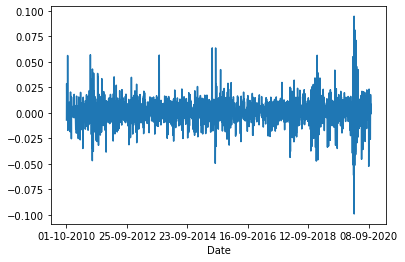

In [103]:
# Plot
daily_return['Portfolio_Daily_Return'].plot()
plt.show()

In [104]:
# Cumulative return from the portfolio
Cumulative_returns_portfolio = (1+daily_return).cumprod()
Cumulative_returns_portfolio.tail()

,Close_AAPL,Close_JNJ,Close_GOOG,Portfolio_Daily_Return
Date,,,,
24-09-2020,10.725471,2.342834,5.455057,5.784494
25-09-2020,11.127849,2.358866,5.518724,5.888478
28-09-2020,11.393459,2.382348,5.593430,5.980113
29-09-2020,11.307234,2.381538,5.611801,5.973782
30-09-2020,11.477700,2.411012,5.612832,6.023419


In [105]:
Cumulative_returns_portfolio.Portfolio_Daily_Return.iloc[-1]-1

5.023418663149598

This means that the portfolio has achieved the cummulative of 499% in the given period

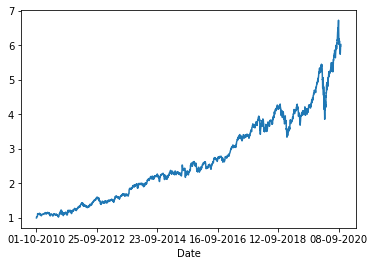

In [106]:
# Plot
Cumulative_returns_portfolio['Portfolio_Daily_Return'].plot()
plt.show()

Portfolio Risk – Portfolio Standard Deviation
By looking into the portfolio standard deviation formula, we need three elements:

Portfolio weight array
Portfolio covariance matrix
Transpose of portfolio weight array
The weight for each stock in the portfolio is already available. We need to calculate the daily covariance. Remember, the covariance must be annualised by multiplying with 252 (Number of  trading days in a year).

In [107]:
# Covariance matrix for the portfolio

# Removing the last column (Portfolio_Daily_Return) from our calculation.
covariance_portfolio = daily_return.iloc[:,:-1]
covariance_portfolio = (covariance_portfolio.cov())*252

covariance_portfolio

,Close_AAPL,Close_JNJ,Close_GOOG
Close_AAPL,0.079115,0.018014,0.038189
Close_JNJ,0.018014,0.029648,0.018386
Close_GOOG,0.038189,0.018386,0.066854


In [108]:
# Applying the matrix operations mentioned in the image above
portfolio_variance = np.dot(initial_weight.T,np.dot(covariance_portfolio, initial_weight))

In [109]:
# Standard deviation (risk of portfolio)
portfolio_risk = np.sqrt(portfolio_variance)
portfolio_risk

0.19314705569563642

## Sharpe ratio

In [110]:
# Assuming that the risk free rate is zero
Sharpe_Ratio = daily_return['Portfolio_Daily_Return'].mean() / daily_return['Portfolio_Daily_Return'].std()
Sharpe_Ratio

0.0647598581309878

In [111]:
Annualised_Sharpe_Ratio = (252**0.5)*Sharpe_Ratio
Annualised_Sharpe_Ratio

1.028030877326507

Our portfolio looks good lets do the stationary test.

## Stationarity Test

In [112]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to check for stationarity
# Creating a function for testing all the columns

from statsmodels.tsa.stattools import kpss

for col in portfolio_final.columns:
    kpss_test = kpss(portfolio_final[col])
    
    print(col)
    print('KPSS Statistic: %f' % kpss_test[0])
    print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
    print('p-value: %f' % kpss_test[1])
    
    if kpss_test[1] <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")
        
    print('\n--------------------------------------\n')

Close_AAPL
KPSS Statistic: 6.756153
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

Close_JNJ
KPSS Statistic: 8.709663
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

Close_GOOG
KPSS Statistic: 8.721507
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------



C:\Users\Nitish\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\Nitish\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\Nitish\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


All the series are stationary. Hence, differencing is not required for any columns. 

## Test-Train Split

In [113]:
# Keeping 70% values as train
train_len = int(portfolio_final.shape[0]*0.7)
test_len = int(portfolio_final.shape[0]) - int(portfolio_final.shape[0]*0.7)

# Train portfolio_returns
train_data = portfolio_final[:train_len] 

# Test portfolio_returns
test_data = portfolio_final[train_len:]

In [114]:
portfolio_final.head()

,Close_AAPL,Close_JNJ,Close_GOOG
Date,,,
01-10-2010,10.090000,61.750000,261.828613
04-10-2010,9.951428,61.669998,260.199707
05-10-2010,10.319285,62.799999,268.110046
06-10-2010,10.328215,63.209999,266.177307
07-10-2010,10.329286,63.220001,264.015411


In [115]:
train_data.shape

(1761, 3)

## Model fitting

In [116]:
# Fitting the VAR model to the data
from statsmodels.tsa.api import VAR

model = VAR(train_data)

C:\Users\Nitish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Nitish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [117]:
model_fit = model.fit()

# To select the lag order
x = model.select_order(maxlags=50)
x.summary()

,AIC,BIC,FPE,HQIC
0,17.12,17.13,2.715e+07,17.12
1,1.337,1.375*,3.809,1.351*
2,1.335*,1.402,3.801*,1.360
3,1.341,1.436,3.822,1.376
4,1.339,1.463,3.814,1.385
5,1.341,1.494,3.824,1.398
6,1.347,1.528,3.844,1.414
7,1.353,1.563,3.868,1.431
8,1.359,1.597,3.891,1.447
9,1.363,1.630,3.906,1.461


In [118]:
# Providing maxlags as 26 (minimum AIC vaue)
results = model.fit(maxlags = 1, ic = 'aic')

In [119]:
# Printing the results - Evaluation parameters, lag coefficients, etc.
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 09, Feb, 2022
Time:                     18:25:00
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    1.31487
Nobs:                     1760.00    HQIC:                   1.29135
Log likelihood:          -8604.24    FPE:                    3.58786
AIC:                      1.27756    Det(Omega_mle):         3.56351
--------------------------------------------------------------------
Results for equation Close_AAPL
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.094699         0.055020           -1.721           0.085
L1.Close_AAPL         0.996679         0.002118          470.606           0.000
L1.Close_JNJ          0.003569         0.001359        

In [120]:
# Forecasting using the VAR model
# Selecting the lag value from the above results
lag_order = 1

In [121]:
# Obtaining the forecast values
predicted = results.forecast(train_data.values[-lag_order:], test_len)
forecast = pd.DataFrame(predicted, index = portfolio_final.index[train_len:], columns = portfolio_final.columns)

In [122]:
forecast

,Close_AAPL,Close_JNJ,Close_GOOG
Date,,,
29-09-2017,38.307080,129.535377,949.774361
02-10-2017,38.294363,129.600650,950.049314
03-10-2017,38.281848,129.665819,950.324859
04-10-2017,38.269534,129.730884,950.600998
05-10-2017,38.257419,129.795846,950.877731
...,...,...,...
24-09-2020,45.839597,166.336117,1248.680498
25-09-2020,45.853549,166.382123,1249.122246
28-09-2020,45.867502,166.428133,1249.564028


## Model Evaluation

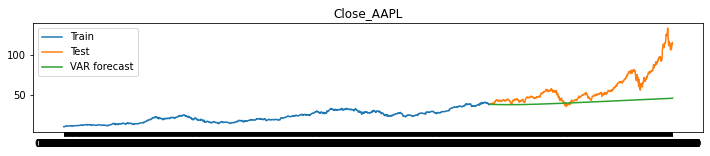

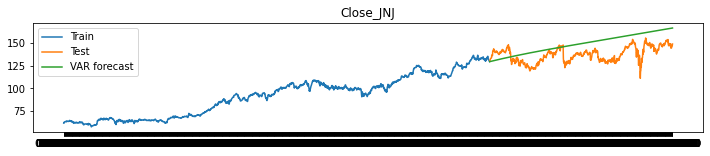

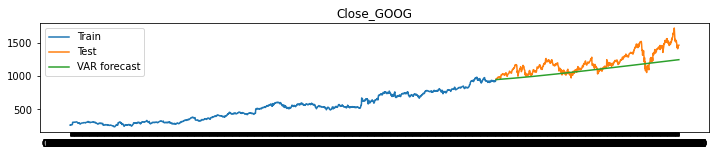

In [123]:
# Printing the train, test and forecasted values
for col in portfolio_final.columns:
    plt.figure(figsize=(12,2))
    plt.plot(portfolio_final[col][:train_len], label='Train')
    plt.plot(portfolio_final[col][train_len:], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    plt.title(col)
    plt.show()

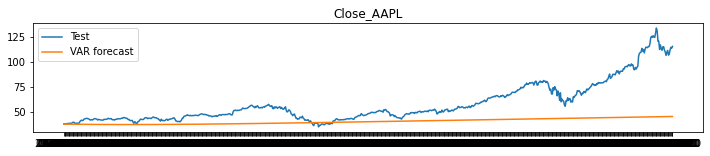

<Figure size 432x288 with 0 Axes>

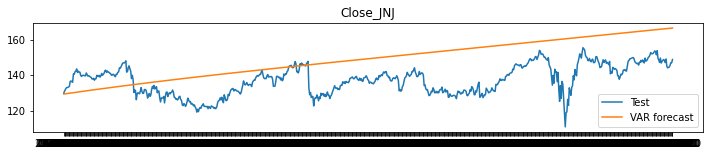

<Figure size 432x288 with 0 Axes>

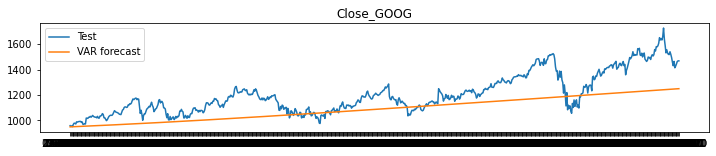

<Figure size 432x288 with 0 Axes>

In [124]:
# Comparing the test and forecasted values
for col in portfolio_final.columns:
    plt.figure(figsize=(12,2))
    plt.plot(portfolio_final[col][train_len:], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    plt.title(col)
    plt.show()
    plt.savefig('plot1.png', dpi=300, bbox_inches='tight')

In [125]:
from sklearn.metrics import mean_squared_error

eval_results = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])
tempResults = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])

for col in portfolio_final.columns:
    rmse = np.sqrt(mean_squared_error(test_data[col], forecast[col][:])).round(2)
    mape = np.round(np.mean(np.abs(test_data[col]-forecast[col][:])/test_data[col])*100,2)

    tempResults = pd.DataFrame({'Column':[col], 'RMSE': [rmse],'MAPE': [mape] })
    eval_results = pd.concat([eval_results, tempResults])
    
eval_results

,Column,RMSE,MAPE
0,Close_AAPL,24.87,24.66
0,Close_JNJ,15.39,10.07
0,Close_GOOG,150.48,9.39
